In [181]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy import stats
import missingno as msno
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-dataset/Online Sales Dataset.csv


# **1. Initial Data Investegation**

In [182]:
#Dataset Loading & Structure
#load the dataset
url='/kaggle/input/online-sales-dataset/Online Sales Dataset.csv'
df=pd.read_csv(url)
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [183]:
#examine its dimensions
print(df.shape)
print(df.ndim)
#column names
print(df.columns)

(1155, 9)
2
Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')


In [184]:
#Data types Analysis
df.info()
#assess if each column align with expected format 
"""
1. df['Date'] column is not aligned with expected format as it is better to have a datetime dtype
2.df['Units Sold'] column is not aligned with expected format as it is better to have a int32 dtype
3.df['Units Price'] column is not aligned with expected format as it is better to have a float64 dtype
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB


"\n1. df['Date'] column is not aligned with expected format as it is better to have a datetime dtype\n2.df['Units Sold'] column is not aligned with expected format as it is better to have a int32 dtype\n3.df['Units Price'] column is not aligned with expected format as it is better to have a float64 dtype\n"

In [185]:
date=pd.DataFrame(df['Date'])
date.convert_dtypes()
print(date.loc[0])

Date    2024-01-01 00:00:00
Name: 0, dtype: object


In [186]:
#Initial Content Examination
sample=df.loc[1]
print(type(sample['Units Sold']))
print(type(sample['Unit Price']))
print(type(sample['Date']))

<class 'str'>
<class 'str'>
<class 'str'>


In [187]:
#Basic statistical overview
df.describe(include=['int64','float64'])

,Transaction ID,Total Revenue
count,1155.000000,1.155000e+03
mean,10554.246753,1.531362e+04
std,318.133931,9.172878e+04
min,10001.000000,8.600000e-01
25%,10277.500000,5.831000e+01
50%,10555.000000,4.499900e+02
75%,10831.500000,1.209760e+03
max,11100.000000,2.019764e+06


**Categorical Variable Exploration**

In [188]:
df.describe(include='object')

,Date,Product Category,Product Name,Units Sold,Unit Price,Region,Payment Method
count,1155,1155,232,982,1155,1134,983
unique,641,6,171,74,777,3,7
top,2024-12-16,Electronics,Bose QuietComfort 35 Headphones,1,1.0,North America,Credit Card
freq,7,202,5,394,222,384,478


In [189]:
#Data Volume Assessment

# **2. Data Quality Assessment & Cleaning**

In [190]:
#Identify the number of missing data across columns
df_null1=pd.DataFrame(df.isnull().sum()).rename(columns={0:"Number of Missing Values"})
df_null1

,Number of Missing Values
Transaction ID,0
Date,0
Product Category,0
Product Name,923
Units Sold,173
Unit Price,0
Total Revenue,0
Region,21
Payment Method,172


In [191]:
#the percentage of these missing out of the whole column
df_null=pd.DataFrame(df.isnull().sum())/1155*100
df_null2=df_null.apply(lambda x:round(x,2).astype(str)+"%")

In [192]:
df_null2=df_null2.rename(columns={0:'percentage'})
df_null2

,percentage
Transaction ID,0.0%
Date,0.0%
Product Category,0.0%
Product Name,79.91%
Units Sold,14.98%
Unit Price,0.0%
Total Revenue,0.0%
Region,1.82%
Payment Method,14.89%


In [193]:
#make a dataframe with these columns [column name,number of missing,the percentage of these missing out of the whole column]
df_null_whole=pd.concat([df_null1,df_null2],axis=1)
df_null_whole=df_null_whole.T
df_null_whole

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
Number of Missing Values,0,0,0,923,173,0,0,21,172
percentage,0.0%,0.0%,0.0%,79.91%,14.98%,0.0%,0.0%,1.82%,14.89%


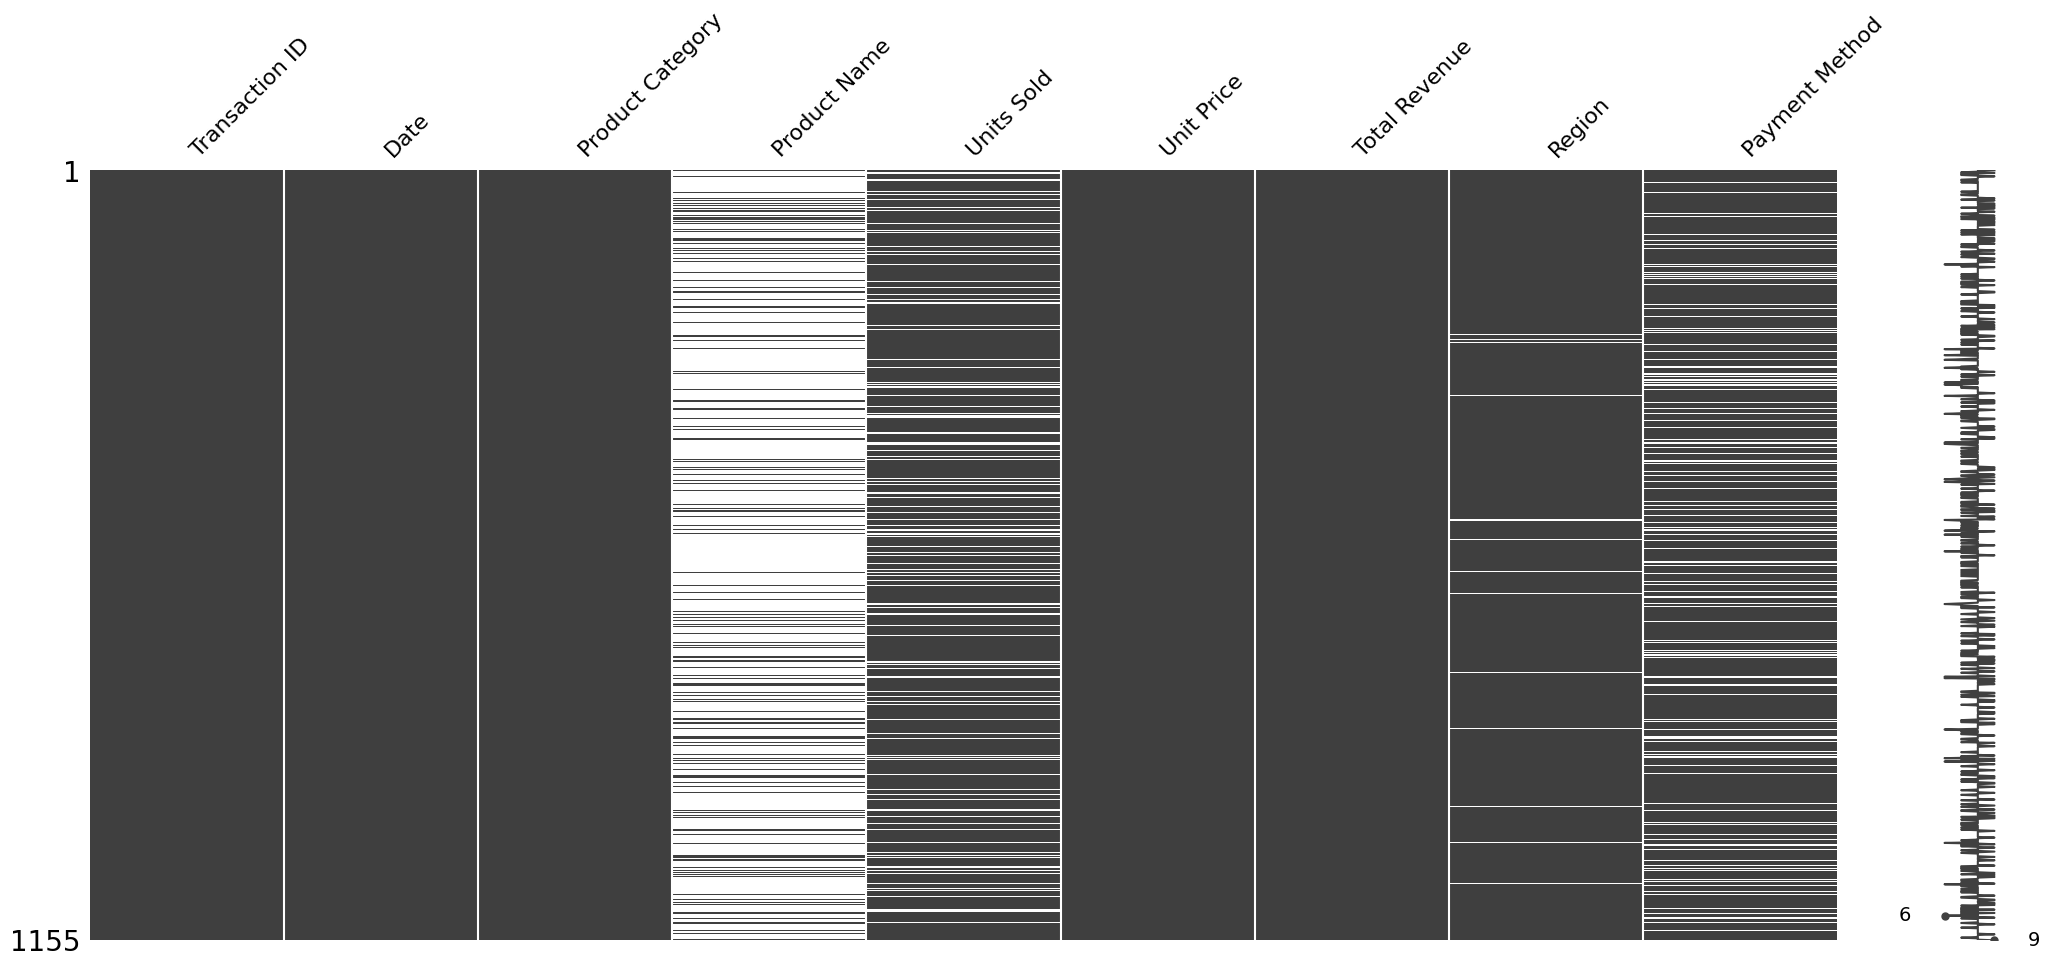

In [194]:
#visualize the missing data using missing_no library for the fields
msno.matrix(df)
plt.show()

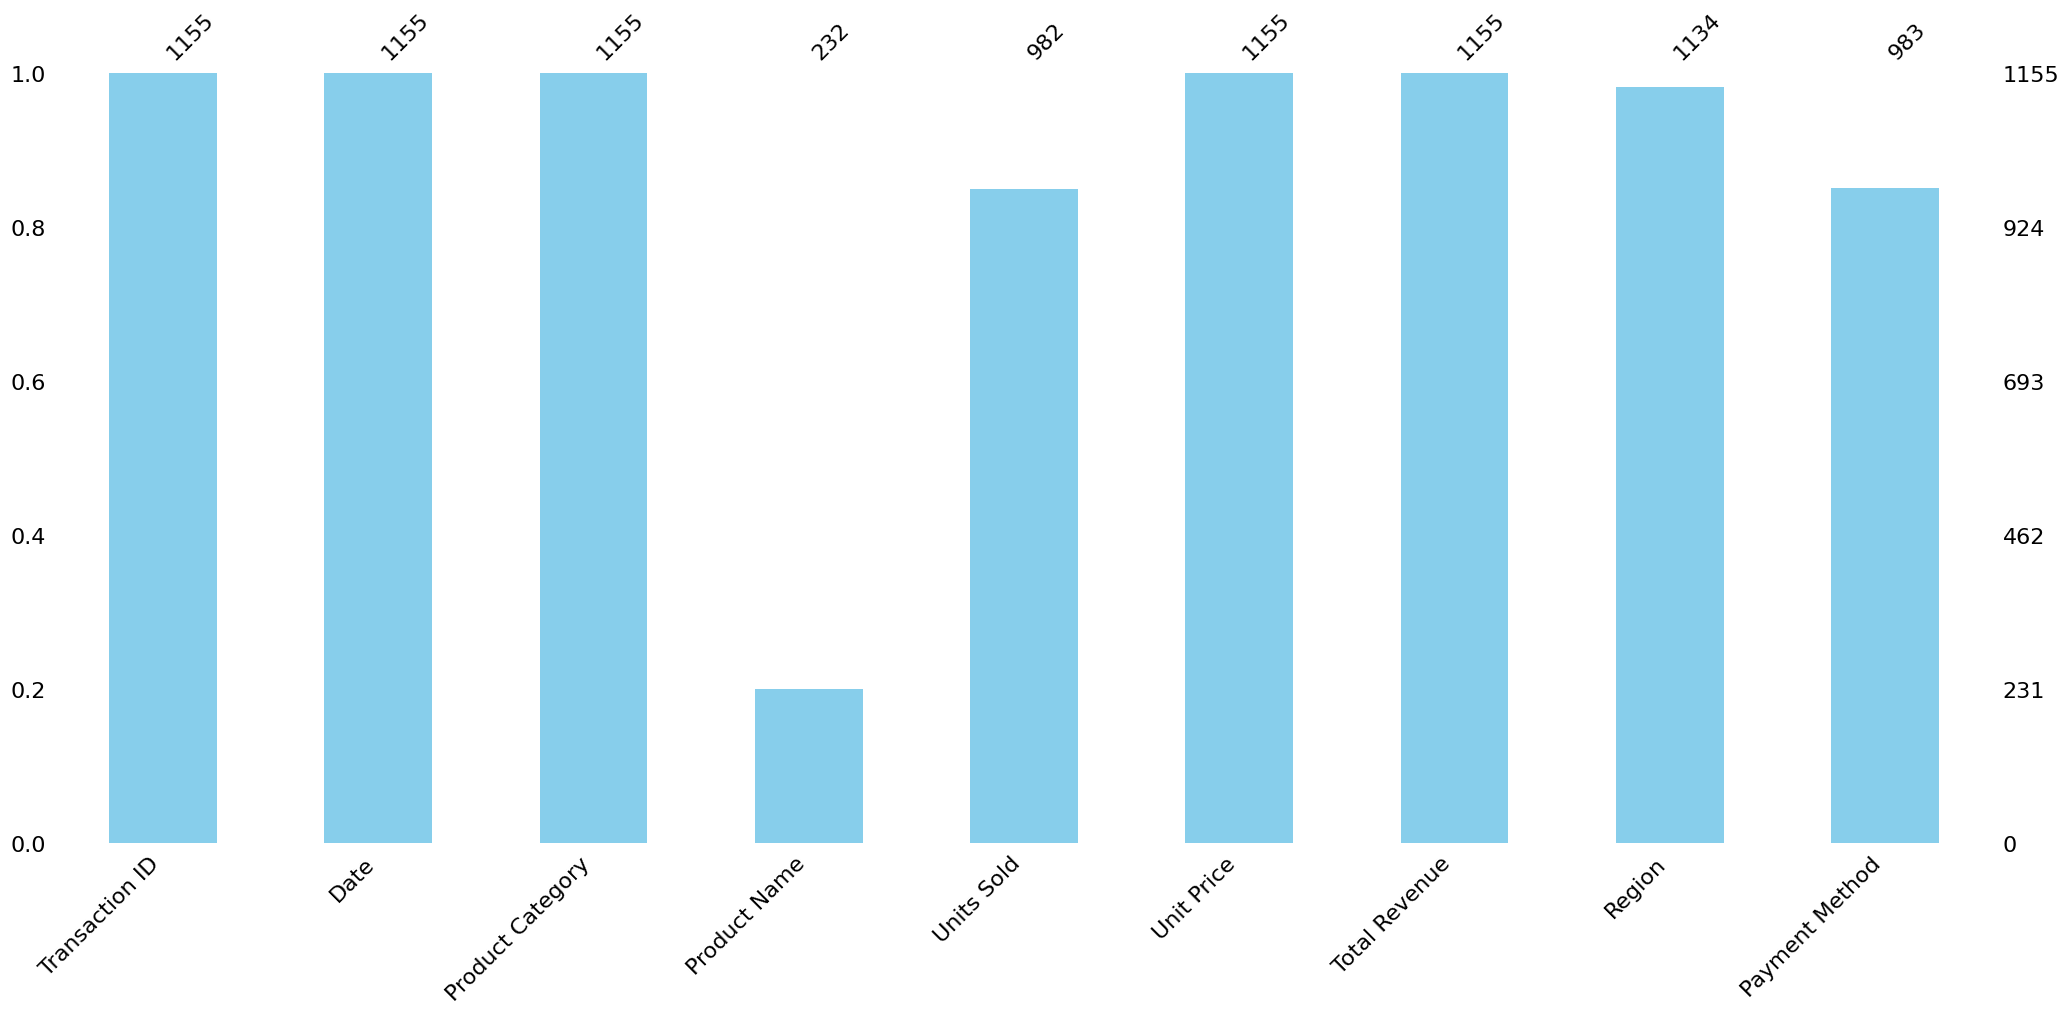

In [195]:
#visualize the missing data using missing_no library for the fields
msno.bar(df,color='skyblue')
plt.show()

In [196]:
df.head(50)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06 00:00:00,Sports,NaN,NaN,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07 00:00:00,Electronics,NaN,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08 00:00:00,Home Appliances,NaN,2,599.99,1199.98,Europe,NaN
8,10009,2024-01-09 00:00:00,Clothing,NaN,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10 00:00:00,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


In [197]:
payment_method=pd.DataFrame(df[['Payment Method','Region']][df['Payment Method'].isnull()])
payment_method['Region'].value_counts()

Region
North America    68
Europe           54
Asia             48
Name: count, dtype: int64

In [198]:
df['Region'].value_counts()

Region
North America    384
Europe           379
Asia             371
Name: count, dtype: int64

In [199]:
Nan_Payment_Method_by_Region_percentage=(payment_method['Region'].value_counts()/df['Region'].value_counts())*100
Nan_Payment_Method_by_Region_percentage

Region
North America    17.708333
Europe           14.248021
Asia             12.938005
Name: count, dtype: float64

**Determine the missing data mechanism**

In [200]:
'''for Units Sold Column , The best missing data mechanism is MAR 
,Because it is related to total price and unit price , if one of value of the 3 columns is NAN , 
you can calculate from the 2 other values'''


''' for Product Name Column, the best missing data mechanism is MCAR, Becaue values in that column
have no relation with other columns at all, so they are missing with out a specific reason '''

''' and From the last cell we can conclude that hight Nan values for Payment Method Columns are related
to Region , due to the available payment methods there, as we can notice that North America and Europe 
has the highest number of Nan values for their payment methods, and since the Payment Method Column is 
related to the Region column , we can consider the best missing data mechanism in this case to be MAR'''

' and From the last cell we can conclude that hight Nan values for Payment Method Columns are related\nto Region , due to the available payment methods there, as we can notice that North America and Europe \nhas the highest number of Nan values for their payment methods, and since the Payment Method Column is \nrelated to the Region column , we can consider the best missing data mechanism in this case to be MAR'

In [201]:
#decide what’s the best way to handle the missings in the columns


''' For Units Sold Column , the best way to handle Nan values is by dividing total revenue 
or total price by the Unit Price Column'''


''' For Product Name Column, the best way to handle Nan values is by dropping that column'''

'''For Payment Method Column, the best way to handle Nan Values is by finding the most used payment
method  (mode values for Payment Method according to the Region)
found in the Region where the Payment happened''' 

'For Payment Method Column, the best way to handle Nan Values is by finding the most used payment\nmethod  (mode values for Payment Method according to the Region)\nfound in the Region where the Payment happened'

**Clean Missing Data & Data Type Validation**

In [202]:
#Turning df['Unit Price'] from str dtype to float dtype,so we can divide the total revenue(price) by unit price
df['Unit Price']=df['Unit Price'].apply(lambda x:(x.split('-')[0]).strip('$') if '-' in x else x)
df['Unit Price']=pd.Series(df['Unit Price'], dtype="float64")
df['Unit Price']=pd.to_numeric(df['Unit Price'],downcast="float")  # ensuring data type validation for unit price column


In [203]:
type(df['Unit Price'][0])

numpy.float32

In [204]:
 # ensuring data type validation for Units Sold column
df['Units Sold'] = (df['Total Revenue'] / df['Unit Price']).round().astype(int)

In [205]:
df['Units Sold'].unique()

array([  2,   1,   3,   4,   5,   6,  10,  97, 340, 245, 499, 422, 349,
       145, 266,   7, 258, 230, 395, 437, 445, 421, 100, 495, 474, 371,
       337, 239, 475, 429, 216, 238, 132, 153, 333, 253,  80, 415, 331,
       338, 354, 274, 127, 156, 273, 207, 159, 404, 229, 451,  90, 489,
       283,  83, 399, 364, 350, 157, 342, 471, 293,  75, 438, 301, 231,
       426, 430, 418, 356, 141, 488, 188, 225, 249, 161, 195, 254, 388,
       494, 306, 215, 411, 228])

In [206]:
#For Product Name Column, the best way to handle Nan values is by dropping that column
df.drop('Product Name',axis=1,inplace=True)

In [207]:
df.shape

(1155, 8)

In [208]:
#mode values for Payment Method according to the Region
df['Payment Method']=df.groupby(by=['Region'])['Payment Method'].transform(lambda x: x.fillna(x.mode()[0]))
df['Payment Method']

0       Credit Card
1            PayPal
2        Debit Card
3       Credit Card
4            PayPal
           ...     
1150         PayPal
1151    Credit Card
1152    Credit Card
1153    Credit Card
1154         PayPal
Name: Payment Method, Length: 1155, dtype: object

In [209]:
df['Payment Method'].isnull().sum()

21

In [210]:
df['Payment Method'].value_counts()

Payment Method
Credit Card       594
PayPal            340
Debit Card        161
Gift Card          15
Mobile Payment     11
Cryptocurrency     10
Bank Transfer       3
Name: count, dtype: int64

In [211]:
df['Payment Method']=df['Payment Method'].fillna(df['Payment Method'].mode()[0])

In [212]:
df['Payment Method'].isnull().sum()

0

In [213]:
df['Payment Method'].value_counts()

Payment Method
Credit Card       615
PayPal            340
Debit Card        161
Gift Card          15
Mobile Payment     11
Cryptocurrency     10
Bank Transfer       3
Name: count, dtype: int64

In [214]:
df['Transaction ID']=df['Transaction ID'].astype('str') # ensuring data type validation for Date column
type(df['Transaction ID'][0])

str

In [215]:
df['Date']=df['Date'].astype('str') # ensuring data type validation for Date column
df['Date'][0]

'2024-01-01 00:00:00'

**Duplicate Detection**

In [216]:
df.drop_duplicates(subset='Transaction ID',keep='first',inplace=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1100 non-null   object 
 1   Date              1100 non-null   object 
 2   Product Category  1100 non-null   object 
 3   Units Sold        1100 non-null   int64  
 4   Unit Price        1100 non-null   float32
 5   Total Revenue     1100 non-null   float64
 6   Region            1079 non-null   object 
 7   Payment Method    1100 non-null   object 
dtypes: float32(1), float64(1), int64(1), object(5)
memory usage: 73.0+ KB


In [218]:
numerical_cols=df.select_dtypes(include=['int32','float32','float64'])
numerical_cols

,Unit Price,Total Revenue
0,999.989990,1999.98
1,499.989990,499.99
2,69.989998,209.97
3,15.990000,63.96
4,89.989998,89.99
...,...,...
1095,1.000000,1.00
1096,884.260010,3537.04
1097,1169.380005,4677.52
1098,539.799988,2159.20


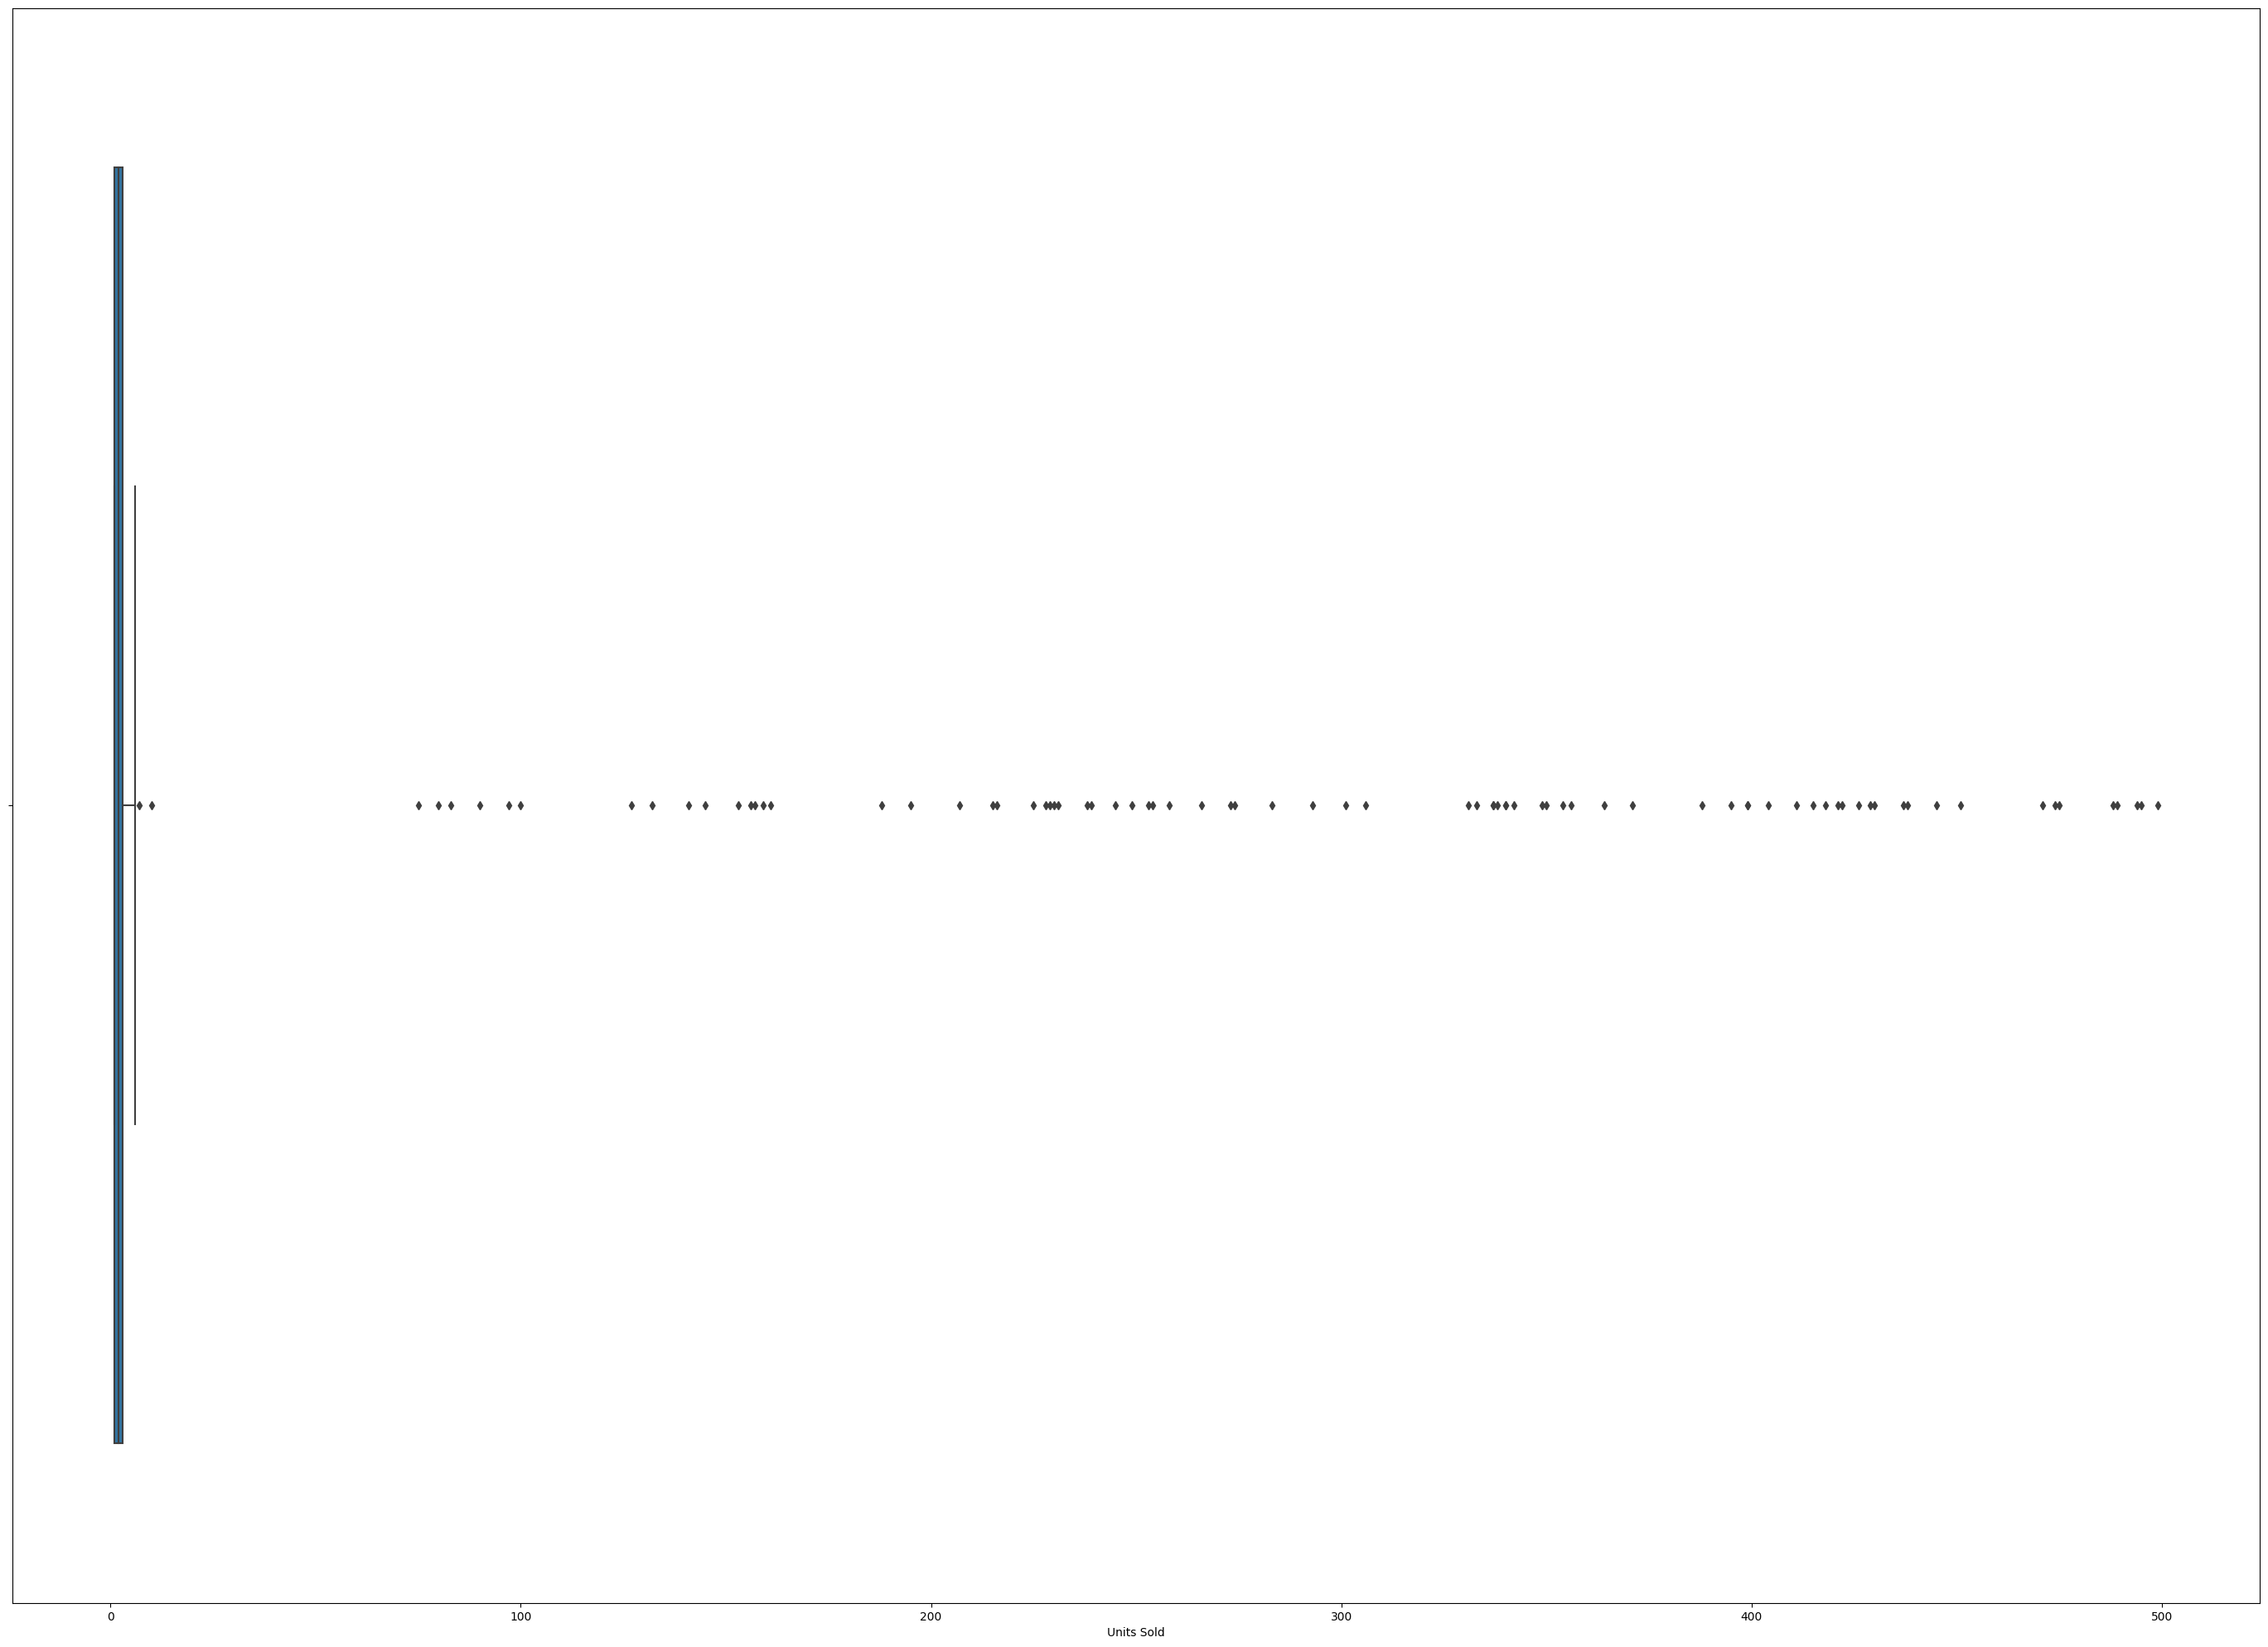

In [219]:
plt.figure(figsize=(35,25))
sns.boxplot(x=df['Units Sold'])
plt.show()

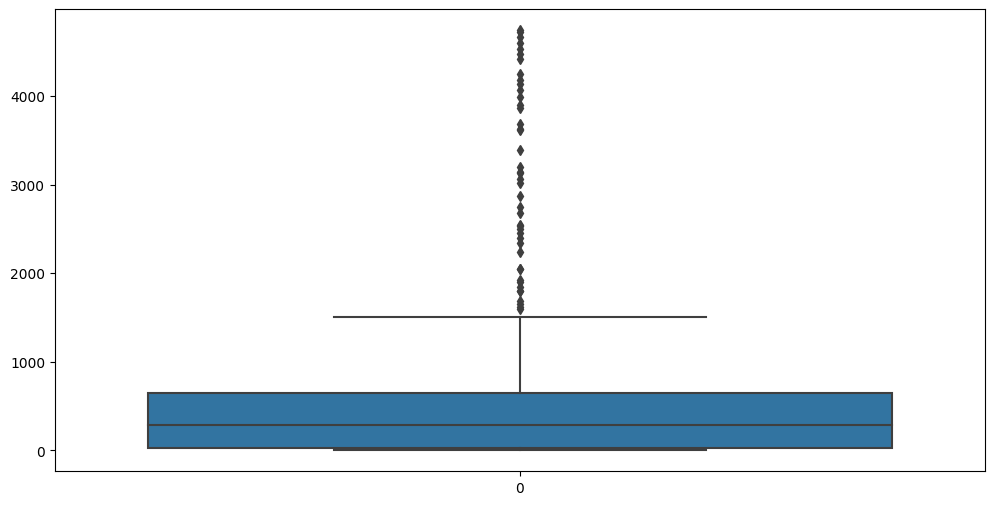

In [220]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Unit Price'])
plt.show()

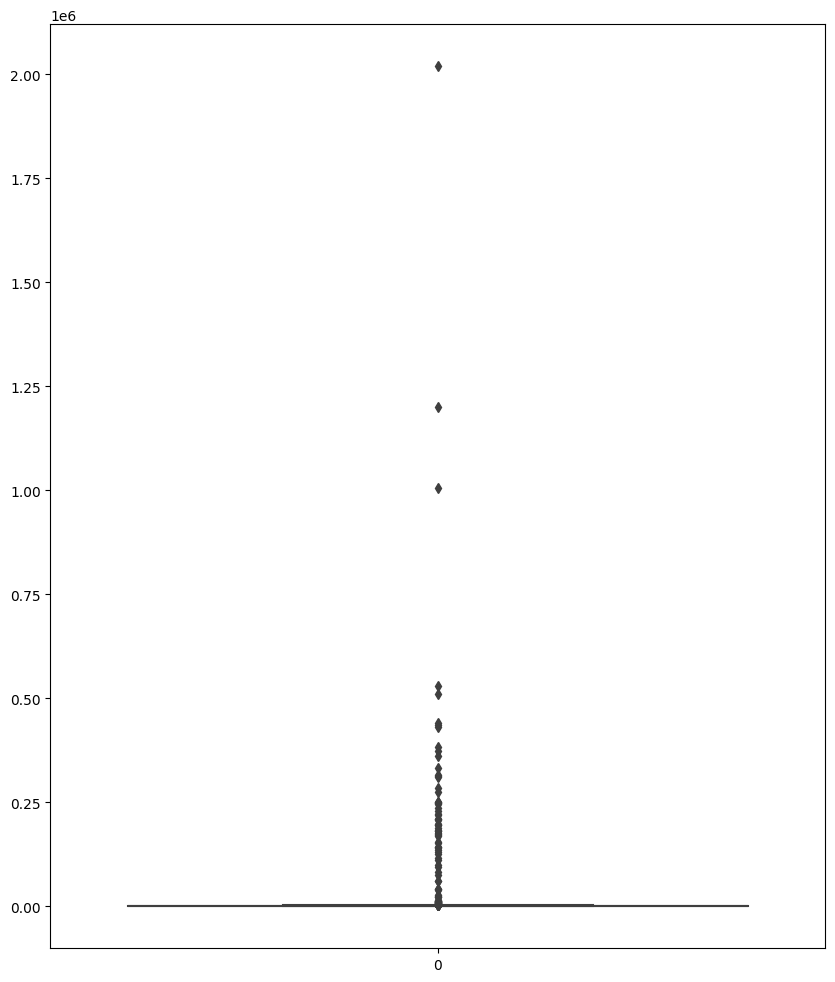

In [221]:
plt.figure(figsize=(10,12))
sns.boxplot(df['Total Revenue'])
plt.show()

In [222]:
Q1=df['Units Sold'].quantile(0.25)
Q3=df['Units Sold'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR #left whisker
upper_bound=Q3+1.5*IQR #right Whisker

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

df['Units Sold']=np.where(df['Units Sold']>upper_bound,upper_bound,df['Units Sold'])
df['Units Sold']=np.where(df['Units Sold']<lower_bound,lower_bound,df['Units Sold'])


Lower Bound: -2.0
Upper Bound: 6.0


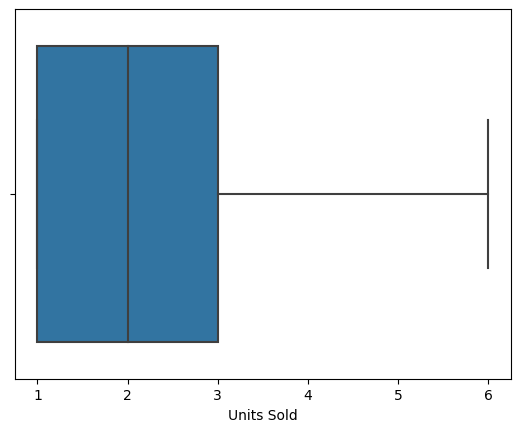

<Figure size 1200x600 with 0 Axes>

In [223]:
sns.boxplot(x=df['Units Sold'])
plt.figure(figsize=(12,6))
plt.show()

In [224]:
Q1=df['Unit Price'].quantile(0.25)
Q3=df['Unit Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR #left whisker
upper_bound=Q3+1.5*IQR #right Whisker

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

df['Unit Price']=np.where(df['Unit Price']>upper_bound,upper_bound,df['Unit Price'])
df['Unit Price']=np.where(df['Unit Price']<lower_bound,lower_bound,df['Unit Price'])


Lower Bound: -902.7300117015839
Upper Bound: 1570.8500187397003


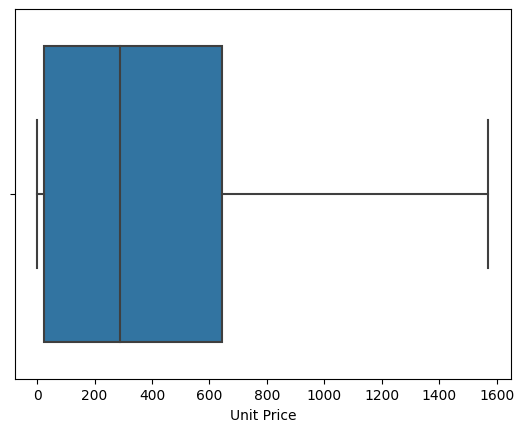

<Figure size 1200x600 with 0 Axes>

In [225]:
sns.boxplot(x=df['Unit Price'])
plt.figure(figsize=(12,6))
plt.show()

In [226]:
Q1=df['Total Revenue'].quantile(0.25)
Q3=df['Total Revenue'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR #left whisker
upper_bound=Q3+1.5*IQR #right Whisker

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

df['Total Revenue']=np.where(df['Total Revenue']>upper_bound,upper_bound,df['Total Revenue'])
df['Total Revenue']=np.where(df['Total Revenue']<lower_bound,lower_bound,df['Total Revenue'])

Lower Bound: -1666.3449999999998
Upper Bound: 2935.1349999999998


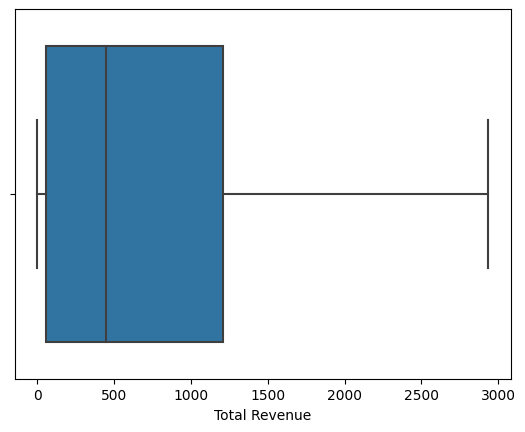

<Figure size 1200x600 with 0 Axes>

In [227]:
sns.boxplot(x=df['Total Revenue'])
plt.figure(figsize=(12,6))
plt.show()

# **3. Exploratory Data Analysis**

**Temporal Analysis (using Date column)**

Daily/Weekly/Monthly sales patterns

In [228]:
from datetime import datetime
import pandas as pd

# Convert the column to datetime
df["Date"] = pd.to_datetime(df["Date"],format="mixed")
df["Date"]

0      2024-01-01
1      2024-01-02
2      2024-01-03
3      2024-01-04
4      2024-01-05
          ...    
1095   2024-04-01
1096   2025-02-07
1097   2024-06-14
1098   2024-02-03
1099   2024-07-30
Name: Date, Length: 1100, dtype: datetime64[ns]

In [229]:
df["Date"].isna().sum()

0

In [230]:
df["day_of_week"] = df["Date"].dt.day_name()
df["day_of_week"]

0          Monday
1         Tuesday
2       Wednesday
3        Thursday
4          Friday
          ...    
1095       Monday
1096       Friday
1097       Friday
1098     Saturday
1099      Tuesday
Name: day_of_week, Length: 1100, dtype: object

In [231]:
df["Week_Number"] = df["Date"].dt.isocalendar().week
df["Week_Number"] 

0        1
1        1
2        1
3        1
4        1
        ..
1095    14
1096     6
1097    24
1098     5
1099    31
Name: Week_Number, Length: 1100, dtype: UInt32

In [232]:
df["Month_of_Year"] = df["Date"].dt.month_name()
df["Month_of_Year"]

0        January
1        January
2        January
3        January
4        January
          ...   
1095       April
1096    February
1097        June
1098    February
1099        July
Name: Month_of_Year, Length: 1100, dtype: object

In [233]:
df

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day_of_week,Week_Number,Month_of_Year
0,10001,2024-01-01,Electronics,2.0,999.989990,1999.980,North America,Credit Card,Monday,1,January
1,10002,2024-01-02,Home Appliances,1.0,499.989990,499.990,Europe,PayPal,Tuesday,1,January
2,10003,2024-01-03,Clothing,3.0,69.989998,209.970,Asia,Debit Card,Wednesday,1,January
3,10004,2024-01-04,Books,4.0,15.990000,63.960,North America,Credit Card,Thursday,1,January
4,10005,2024-01-05,Beauty Products,1.0,89.989998,89.990,Europe,PayPal,Friday,1,January
...,...,...,...,...,...,...,...,...,...,...,...
1095,11096,2024-04-01,Clothing,1.0,1.000000,1.000,Europe,Debit Card,Monday,14,April
1096,11097,2025-02-07,Electronics,4.0,884.260010,2935.135,Europe,Credit Card,Friday,6,February
1097,11098,2024-06-14,Electronics,4.0,1169.380005,2935.135,Asia,PayPal,Friday,24,June
1098,11099,2024-02-03,Sports,4.0,539.799988,2159.200,North America,Gift Card,Saturday,5,February


In [234]:
#Plot total revenue and transaction count over time to identify which days of the week have higher sales activity
df_DOW=df.groupby(['day_of_week'])[['Transaction ID','Total Revenue']].count()
df_DOW

,Transaction ID,Total Revenue
day_of_week,,
Friday,155,155
Monday,156,156
Saturday,155,155
Sunday,150,150
Thursday,147,147
Tuesday,162,162
Wednesday,175,175


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


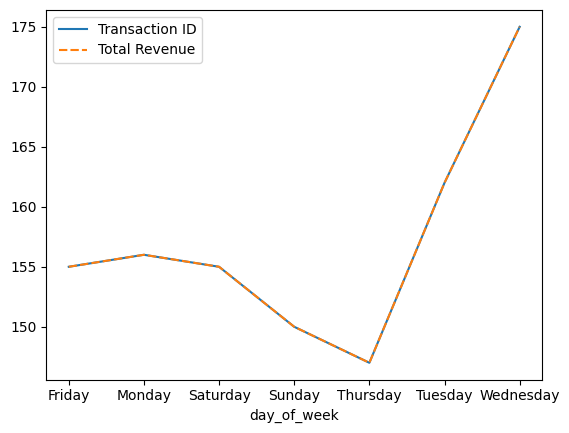

In [235]:
sns.lineplot(data=df_DOW)
plt.show()

In [236]:
#Plot total revenue and transaction count over time to identify which months have higher sales activity
df_MOY=df.groupby(['Month_of_Year'])[['Transaction ID','Total Revenue']].count()
df_MOY

,Transaction ID,Total Revenue
Month_of_Year,,
April,112,112
August,92,92
December,49,49
February,151,151
January,133,133
July,85,85
June,70,70
March,143,143
May,94,94


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


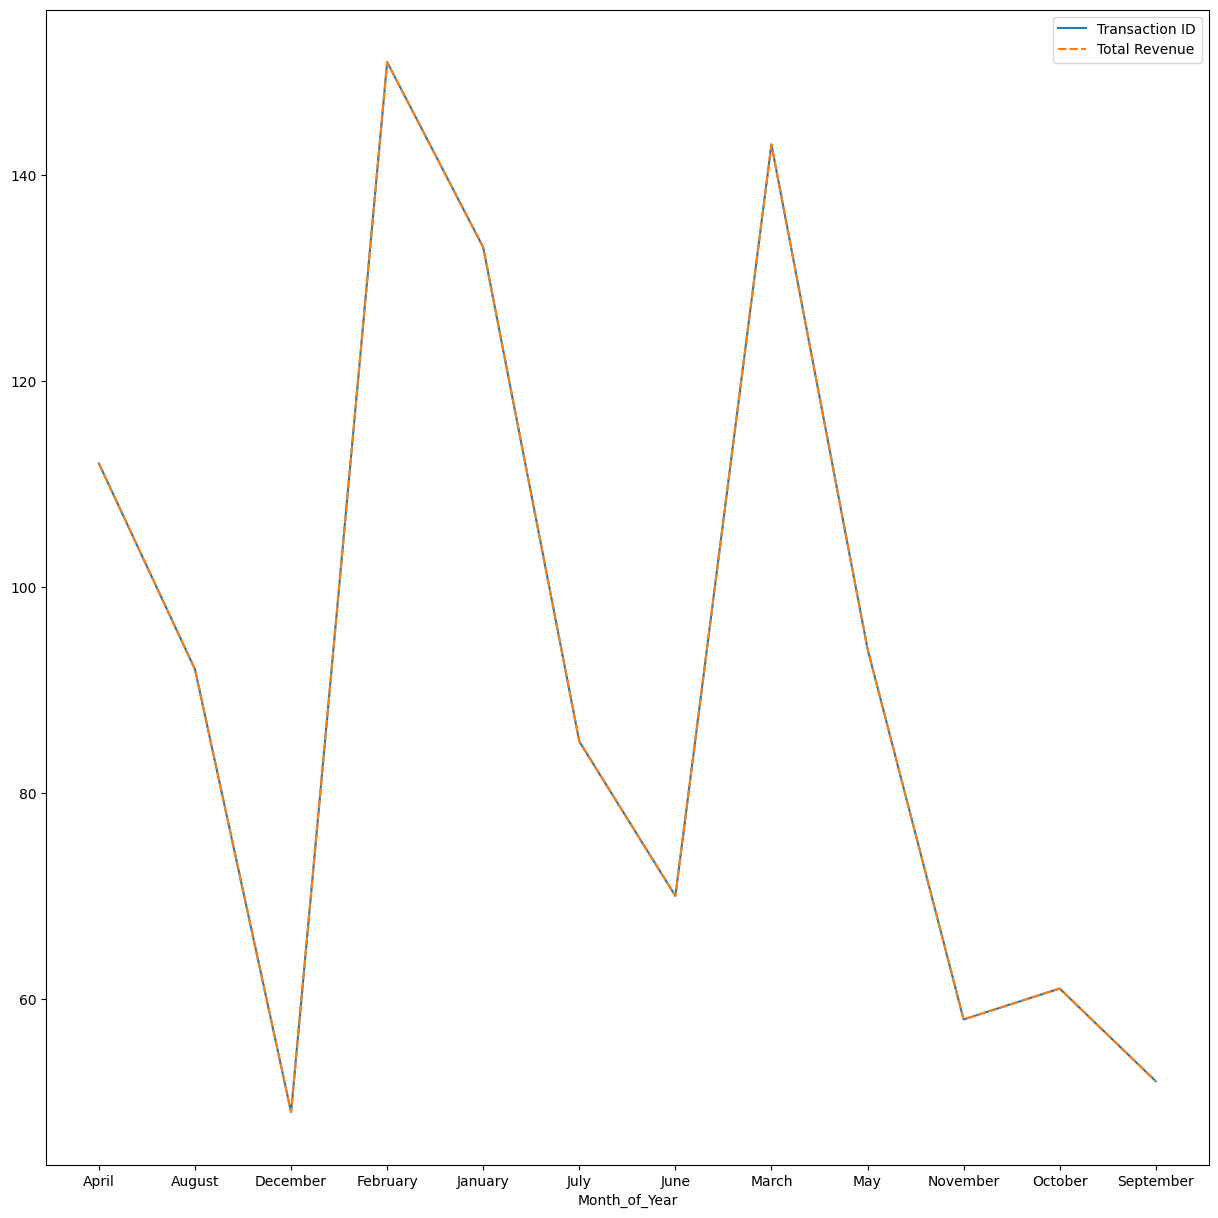

In [237]:
plt.figure(figsize=(15,15))
sns.lineplot(data=df_MOY)
plt.show()

In [238]:
#Plot total revenue and transaction count over time to identify which  weeks of the month have higher sales activity
df_WN=df.groupby(['Week_Number'])[['Transaction ID','Total Revenue']].count()
df_WN

,Transaction ID,Total Revenue
Week_Number,,
1,31,31
2,30,30
3,25,25
4,30,30
5,41,41
6,34,34
7,35,35
8,43,43
9,29,29


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


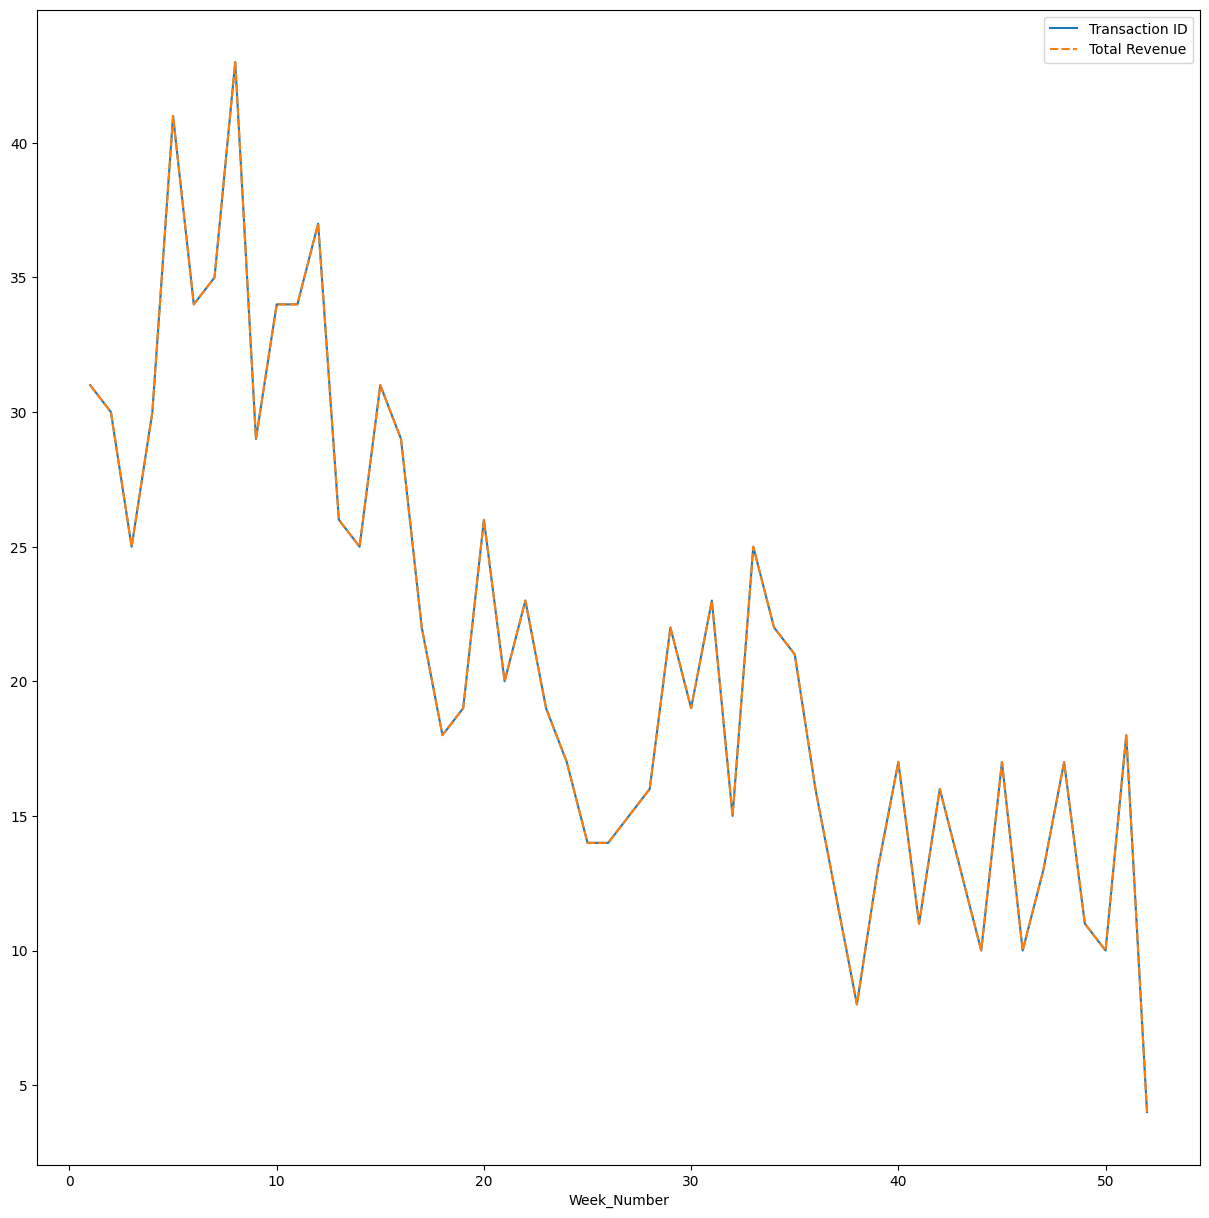

In [239]:
plt.figure(figsize=(15,15))
sns.lineplot(data=df_WN)
plt.show()

Seasonal variations and peak periods

In [240]:

df_month = df.groupby('Month_of_Year')['Total Revenue'].sum()
print(df_month)

#Seasonal variations and peak periods
#determine which months or seasons generate the highest revenue and transaction volume
peak_month = df_month.idxmax()
peak_value = df_month.max()

print(f"Peak month : {peak_month} with revenue value or peak value: {peak_value}")

Month_of_Year
April        100668.280
August        73234.945
December      47595.980
February     134933.520
January      102098.670
July          60263.040
June          37722.200
March        118662.505
May           64871.785
November      54164.290
October       62179.980
September     46683.750
Name: Total Revenue, dtype: float64
Peak month : February with revenue value or peak value: 134933.52


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


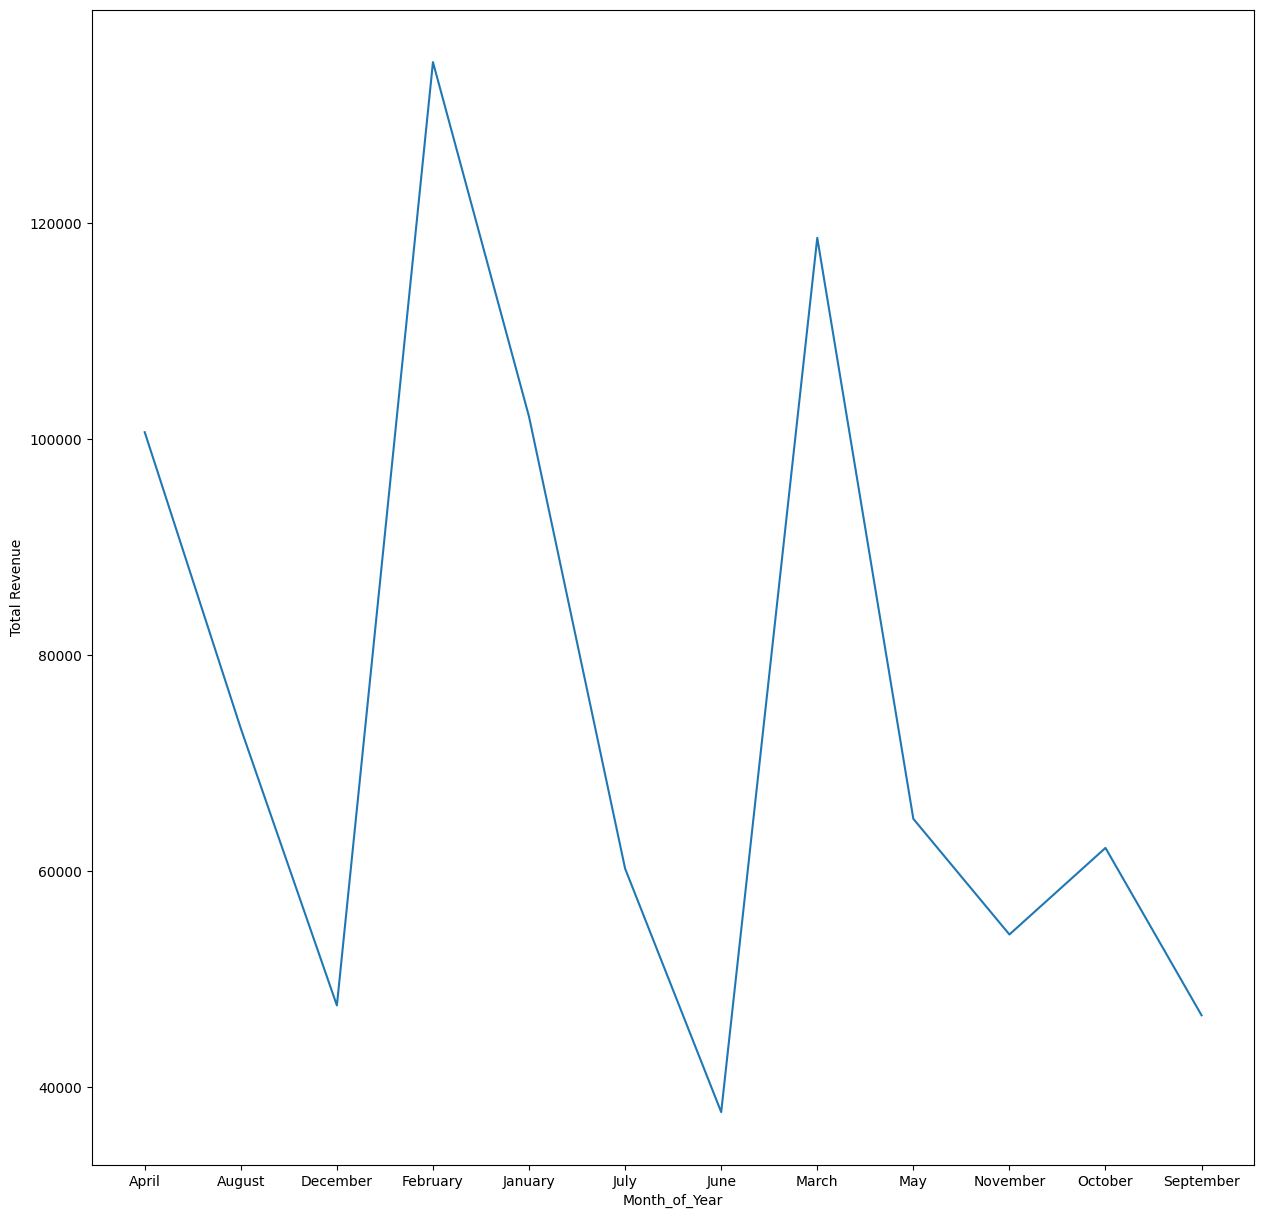

In [241]:
#Sales trend identification
#line charts showing revenue progression over time to identify if sales are increasing, decreasing, or stable throughout the dataset period
plt.figure(figsize=(15,15))
sns.lineplot(data=df_month)
plt.show()

**Product Category Performance (using Category, Unit_Price, Quantity, 
Total_Price):**

Revenue distribution across categories:

In [242]:
df['Product Category'].value_counts()

Product Category
Electronics        191
Clothing           185
Books              183
Sports             183
Beauty Products    182
Home Appliances    176
Name: count, dtype: int64

In [243]:
Revenue_by_Categ_sum=df.groupby(['Product Category'])['Total Revenue'].sum()
Revenue_by_Categ_sum

Product Category
Beauty Products    131621.965
Books              124611.290
Clothing           120050.000
Electronics        207110.055
Home Appliances    147113.560
Sports             172572.075
Name: Total Revenue, dtype: float64

In [244]:
Revenue_by_Categ_sum.index

Index(['Beauty Products', 'Books', 'Clothing', 'Electronics',
       'Home Appliances', 'Sports'],
      dtype='object', name='Product Category')

In [245]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, hatch=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie

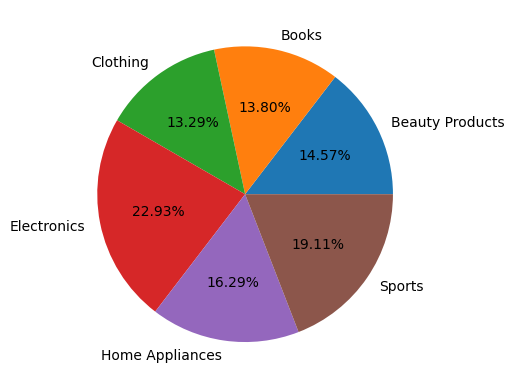

In [246]:
labels=['Beauty Products', 'Books', 'Clothing', 'Electronics','Home Appliances', 'Sports']
plt.pie(x=Revenue_by_Categ_sum,autopct='%0.2f%%',labels=labels)
plt.show()

Average order values by category

In [247]:
Revenue_by_Categ_mean=df.groupby(['Product Category'])['Total Revenue'].mean()
Revenue_by_Categ_mean

Product Category
Beauty Products     723.197610
Books               680.936011
Clothing            648.918919
Electronics        1084.345838
Home Appliances     835.872500
Sports              943.016803
Name: Total Revenue, dtype: float64

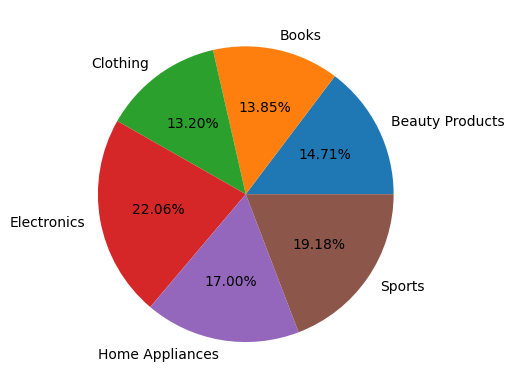

In [248]:
labels=['Beauty Products', 'Books', 'Clothing', 'Electronics','Home Appliances', 'Sports']
plt.pie(x=Revenue_by_Categ_mean,autopct='%0.2f%%',labels=labels)
plt.show()

Quantity patterns by category

In [249]:
units_per_categ=pd.DataFrame(df.groupby(['Product Category','Transaction ID'])['Units Sold'].count())
units_per_categ.loc[['Electronics','Clothing']]
#do customers buy Electronics in single units but Clothing in bulk?
# Answer : NO, they buy both in single units most of time

Units Sold
Product Category Transaction ID            
Electronics      10001                    1
                 10007                    1
                 10013                    1
                 10019                    1
                 10025                    1
...                                     ...
Clothing         11076                    1
                 11079                    1
                 11087                    1
                 11091                    1
                 11096                    1

[376 rows x 1 columns]

**Geographic Analysis (using Region, Total_Price, Category)**

Regional sales performance comparison

In [250]:
Revenue_by_Region_sum=df.groupby(['Region'])['Total Revenue'].sum()
Revenue_by_Region_sum.sort_values(ascending=False)

Region
North America    314121.785
Europe           282605.085
Asia             281975.685
Name: Total Revenue, dtype: float64

In [251]:
Transaction_by_Region_count=df.groupby(['Region'])['Transaction ID'].count()
Transaction_by_Region_count.sort_values(ascending=False)

Region
North America    367
Europe           358
Asia             354
Name: Transaction ID, dtype: int64

Revenue distribution across regions

In [252]:
Revenue_by_Region=df.groupby(['Region'])['Total Revenue'].sum()
Revenue_by_Region.sort_values(ascending=False)

Region
North America    314121.785
Europe           282605.085
Asia             281975.685
Name: Total Revenue, dtype: float64

In [253]:
Revenue_by_Region.index

Index(['Asia', 'Europe', 'North America'], dtype='object', name='Region')

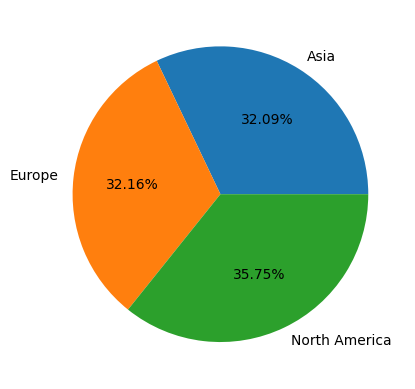

In [254]:
labels=['Asia', 'Europe', 'North America']
plt.pie(x=Revenue_by_Region,autopct='%0.2f%%',labels=labels)
plt.show()

Regional category preferences

In [255]:
product_category_by_region=df.groupby(['Region','Product Category'])['Units Sold'].sum()
product_category_by_region.sort_values(ascending=False)

#does Asia prefer Electronics while Europe prefers Clothing?
#Answer: Asia prefers Clothing While Europe prefers Electronics

Region         Product Category
North America  Books               242.0
Asia           Clothing            218.0
Europe         Home Appliances     180.0
Asia           Sports              178.0
North America  Electronics         173.0
Asia           Electronics         152.0
Europe         Beauty Products     147.0
North America  Sports              120.0
Europe         Sports              115.0
               Electronics         115.0
North America  Clothing            112.0
Asia           Home Appliances     105.0
Europe         Books               104.0
Asia           Beauty Products     103.0
Europe         Clothing            100.0
North America  Beauty Products      96.0
               Home Appliances      93.0
Asia           Books                89.0
Name: Units Sold, dtype: float64

**Payment Method Analysis (using Payment_Method, Total_Price, Region):**

Payment method adoption rates

In [256]:
Transactions_by_Payment_Method=df.groupby(['Payment Method'])['Transaction ID'].count()
Transactions_by_Payment_Method.sort_values(ascending=False)


Payment Method
Credit Card       582
PayPal            325
Debit Card        155
Gift Card          15
Cryptocurrency     10
Mobile Payment     10
Bank Transfer       3
Name: Transaction ID, dtype: int64

In [257]:
df3=pd.DataFrame({"Credit Card":[615],"PayPal":[340],"Bank Transfer":[3],"Digital Wallet":[197]})
df3.rename({0:"Transactions by Payment Method"},inplace=True)

In [258]:
df3

,Credit Card,PayPal,Bank Transfer,Digital Wallet
Transactions by Payment Method,615,340,3,197


In [259]:
Credit_Card_Percentage=df3['Credit Card']/df3.values.sum()*100
PayPal_Percentage=df3['PayPal']/df3.values.sum()*100
Bank_Transfer_Percentage=df3['Bank Transfer']/df3.values.sum()*100
Digital_Wallet_Percentage=df3['Digital Wallet']/df3.values.sum()*100
print(f"Credit Card Percentage: {Credit_Card_Percentage}")
print(f"PayPal Percentage: {PayPal_Percentage}")
print(f"Bank Transfer Percentage: {Bank_Transfer_Percentage}")
print(f"Digital Wallet Percentage: {Digital_Wallet_Percentage}")

Credit Card Percentage: Transactions by Payment Method    53.246753
Name: Credit Card, dtype: float64
PayPal Percentage: Transactions by Payment Method    29.437229
Name: PayPal, dtype: float64
Bank Transfer Percentage: Transactions by Payment Method    0.25974
Name: Bank Transfer, dtype: float64
Digital Wallet Percentage: Transactions by Payment Method    17.056277
Name: Digital Wallet, dtype: float64


Average transaction values by payment type

In [260]:
Total_Revenue_by_Payment_Method_mean=df.groupby(['Payment Method'])['Total Revenue'].mean()
Total_Revenue_by_Payment_Method_mean.sort_values(ascending=False)
#identify if certain payment types correlate with higher spending
#Answer is Yes !! , Bank Transfer is highly correlated with higher spending!!

Payment Method
Bank Transfer     946.453333
Credit Card       892.758325
PayPal            818.525015
Debit Card        632.007677
Gift Card         580.973333
Mobile Payment    454.414000
Cryptocurrency    341.368000
Name: Total Revenue, dtype: float64

Regional payment preferences

In [261]:
payment_method_by_region=df.groupby(['Payment Method','Region'])['Payment Method'].count()
payment_method_by_region.sort_values(ascending=False)


Payment Method  Region       
Credit Card     North America    256
                Asia             192
PayPal          Europe           190
Credit Card     Europe           113
Debit Card      Asia              75
PayPal          Asia              72
                North America     63
Debit Card      Europe            47
                North America     33
Gift Card       Asia               8
Cryptocurrency  North America      5
Gift Card       North America      5
Mobile Payment  Europe             4
Cryptocurrency  Asia               4
Mobile Payment  Asia               3
                North America      3
Bank Transfer   North America      2
Gift Card       Europe             2
Cryptocurrency  Europe             1
Bank Transfer   Europe             1
Name: Payment Method, dtype: int64

**Price and Quantity Insights (using Unit_Price, Quantity, Total_Price, 
Category)**

Price distribution analysis across categories

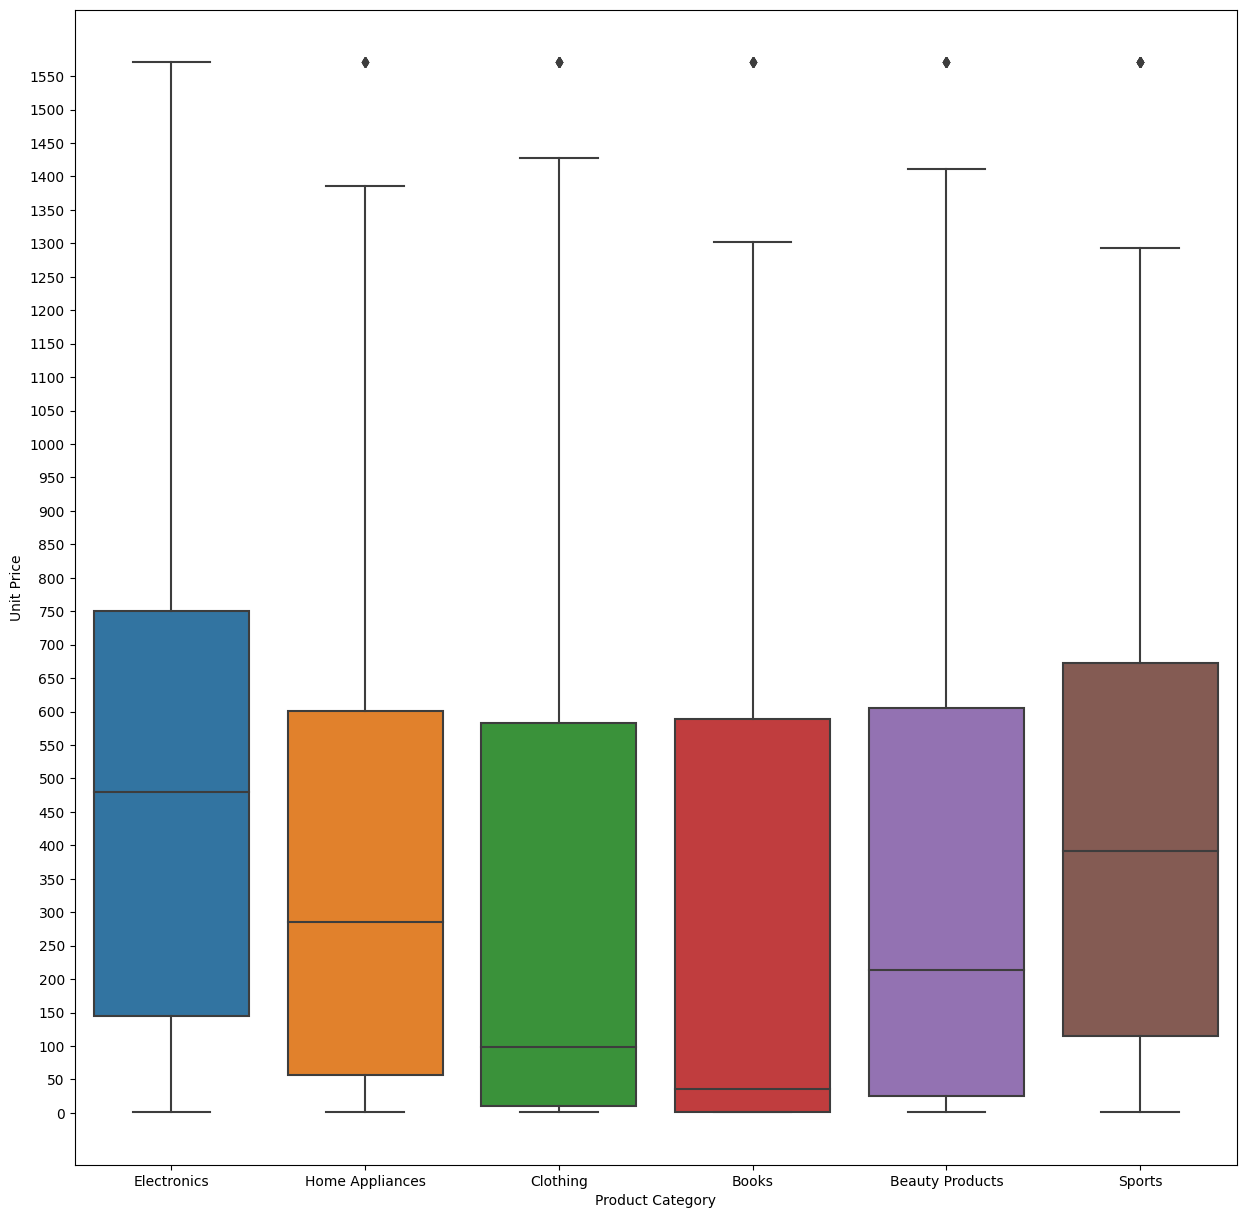

In [262]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x=df["Product Category"],y=df["Unit Price"])
plt.yticks(np.arange(0,1600,50))
plt.show()

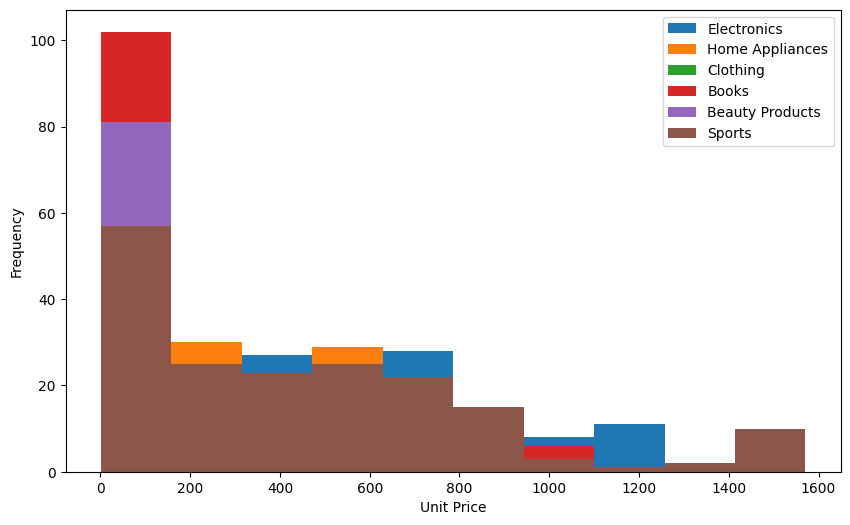

In [263]:
categories=df["Product Category"].unique()
plt.figure(figsize=(10, 6))

for i in categories:
    subset = df[df["Product Category"] == i]
    plt.hist(subset["Unit Price"] ,label=i)

plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Quantity purchase patterns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


'\ncustomers usually buy single items,They also in fewer\ntimes buy small bulks,but they rarely buy large bulk amounts\n'

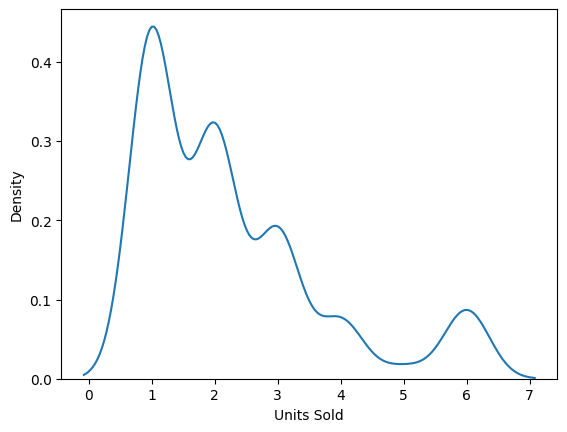

In [264]:
sns.kdeplot(x=df['Units Sold'])
'''
customers usually buy single items,They also in fewer
times buy small bulks,but they rarely buy large bulk amounts
'''

**Cross-Variable Relationships**

<Axes: >

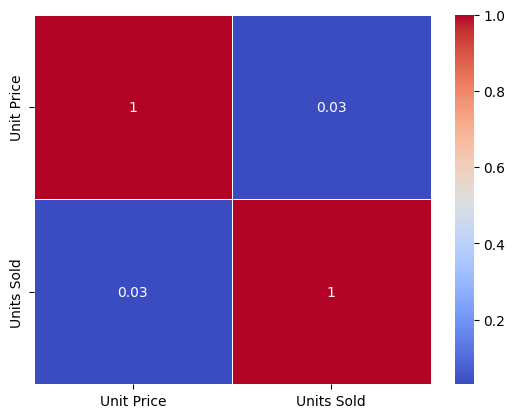

In [265]:
df_h=df[['Unit Price','Units Sold']]
sns.heatmap(df_h.corr(),annot=True,cmap='coolwarm',linewidth=0.5)
#Investigate if higher Unit_Price products are purchased in smaller or larger quantities
#no there is no correlation at all between the unit price and the qunatity sold.

'higher unit prices than 1000 are purchased in smaller quantities (like single unit or two units),\nunlike cheap (less than 1000 price per unit) unit prices they are purchased \nwith 6 units at one transaction'

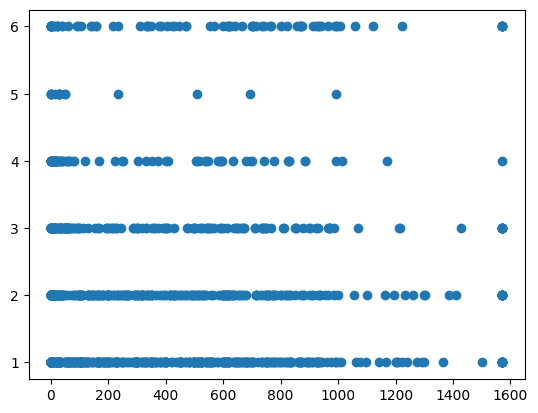

In [266]:
plt.scatter(x=df['Unit Price'],y=df['Units Sold'])


'''higher unit prices than 1000 are purchased in smaller quantities (like single unit or two units),
unlike cheap (less than 1000 price per unit) unit prices they are purchased 
with 6 units at one transaction'''

Regional spending patterns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


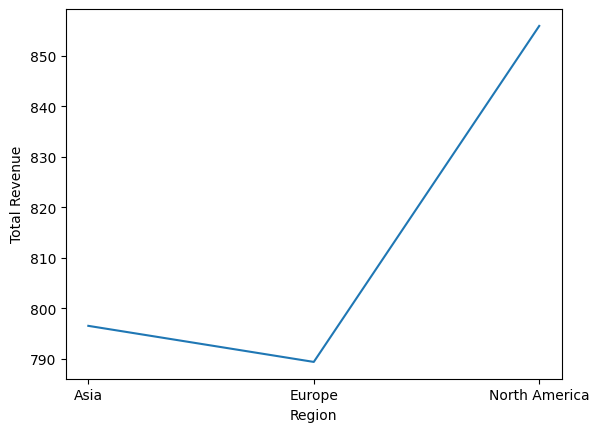

In [267]:
Revenue_by_Region_mean=df.groupby(['Region'])['Total Revenue'].mean()
Revenue_by_Region_mean.sort_values(ascending=False)
sns.lineplot(Revenue_by_Region_mean)
plt.show()

Category-Payment method relationships

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Product Category', ylabel='Payment Method'>

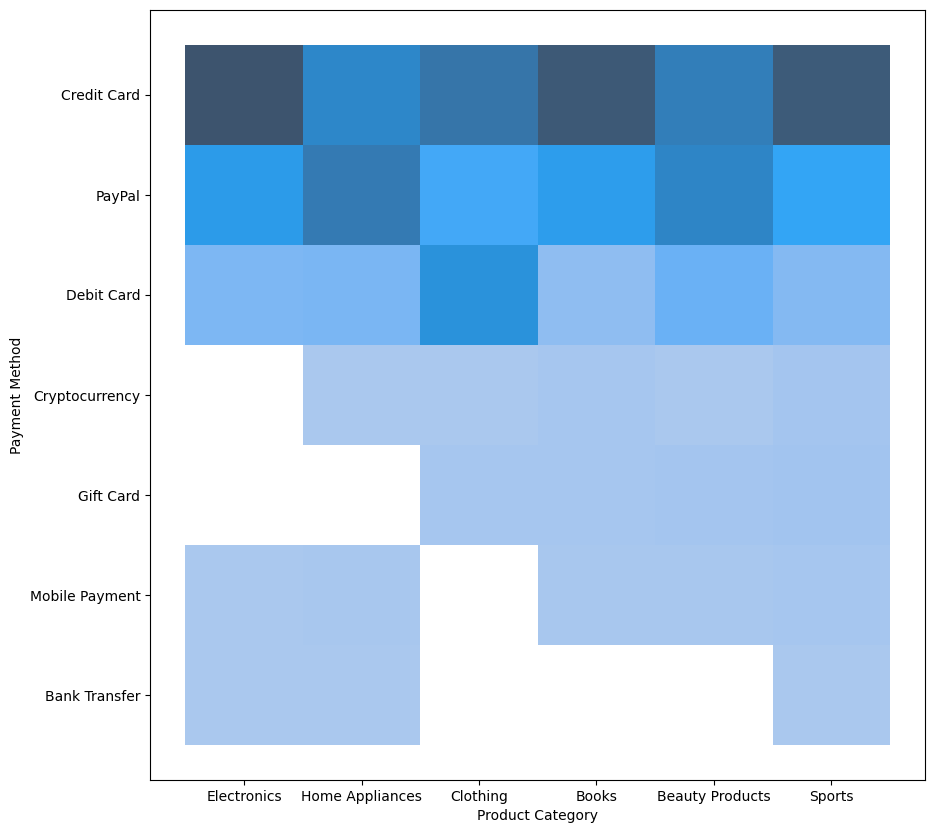

In [268]:
plt.figure(figsize=(10,10))
sns.histplot(x=df['Product Category'],y=df['Payment Method'])
#most of the product catgories are more likely to be purhcased with credit card,paypal and Debit Card
#Books,clothing and Beauty Product are never purchased by Bank Transfer
#Electronics and Home appliances are never purchased by gift card
#Electronics is the only product that is never purchased by cryptocurrency


# **4. Feature Engineering & Data Transformation**

**Extract day of week, month, quarter from Date column** :  (Already Done Previously) 

In [269]:
#Already Done Previously

**Create seasonal indicators (Spring, Summer, Fall, Winter)**

In [270]:
df["Month_of_Year"]

0        January
1        January
2        January
3        January
4        January
          ...   
1095       April
1096    February
1097        June
1098    February
1099        July
Name: Month_of_Year, Length: 1100, dtype: object

In [271]:
season_map = {
    "December": "Winter", "January": "Winter", "February": "Winter",
    "March": "Spring", "April": "Spring", "May": "Spring",
    "June": "Summer", "July": "Summer", "August": "Summer",
    "September": "Fall", "October": "Fall", "November": "Fall"
}
        
df['Seasons']=df['Month_of_Year'].map(season_map)

In [272]:
df['Seasons']

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
1095    Spring
1096    Winter
1097    Summer
1098    Winter
1099    Summer
Name: Seasons, Length: 1100, dtype: object

In [273]:
df_season = df.groupby(['Seasons','Product Category'])['Units Sold'].count().reset_index()
print(df_season)

   Seasons Product Category  Units Sold
0     Fall  Beauty Products          19
1     Fall            Books          26
2     Fall         Clothing          28
3     Fall      Electronics          36
4     Fall  Home Appliances          29
5     Fall           Sports          33
6   Spring  Beauty Products          74
7   Spring            Books          55
8   Spring         Clothing          53
9   Spring      Electronics          55
10  Spring  Home Appliances          56
11  Spring           Sports          56
12  Summer  Beauty Products          37
13  Summer            Books          41
14  Summer         Clothing          44
15  Summer      Electronics          40
16  Summer  Home Appliances          42
17  Summer           Sports          43
18  Winter  Beauty Products          52
19  Winter            Books          61
20  Winter         Clothing          60
21  Winter      Electronics          60
22  Winter  Home Appliances          49
23  Winter           Sports          51


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

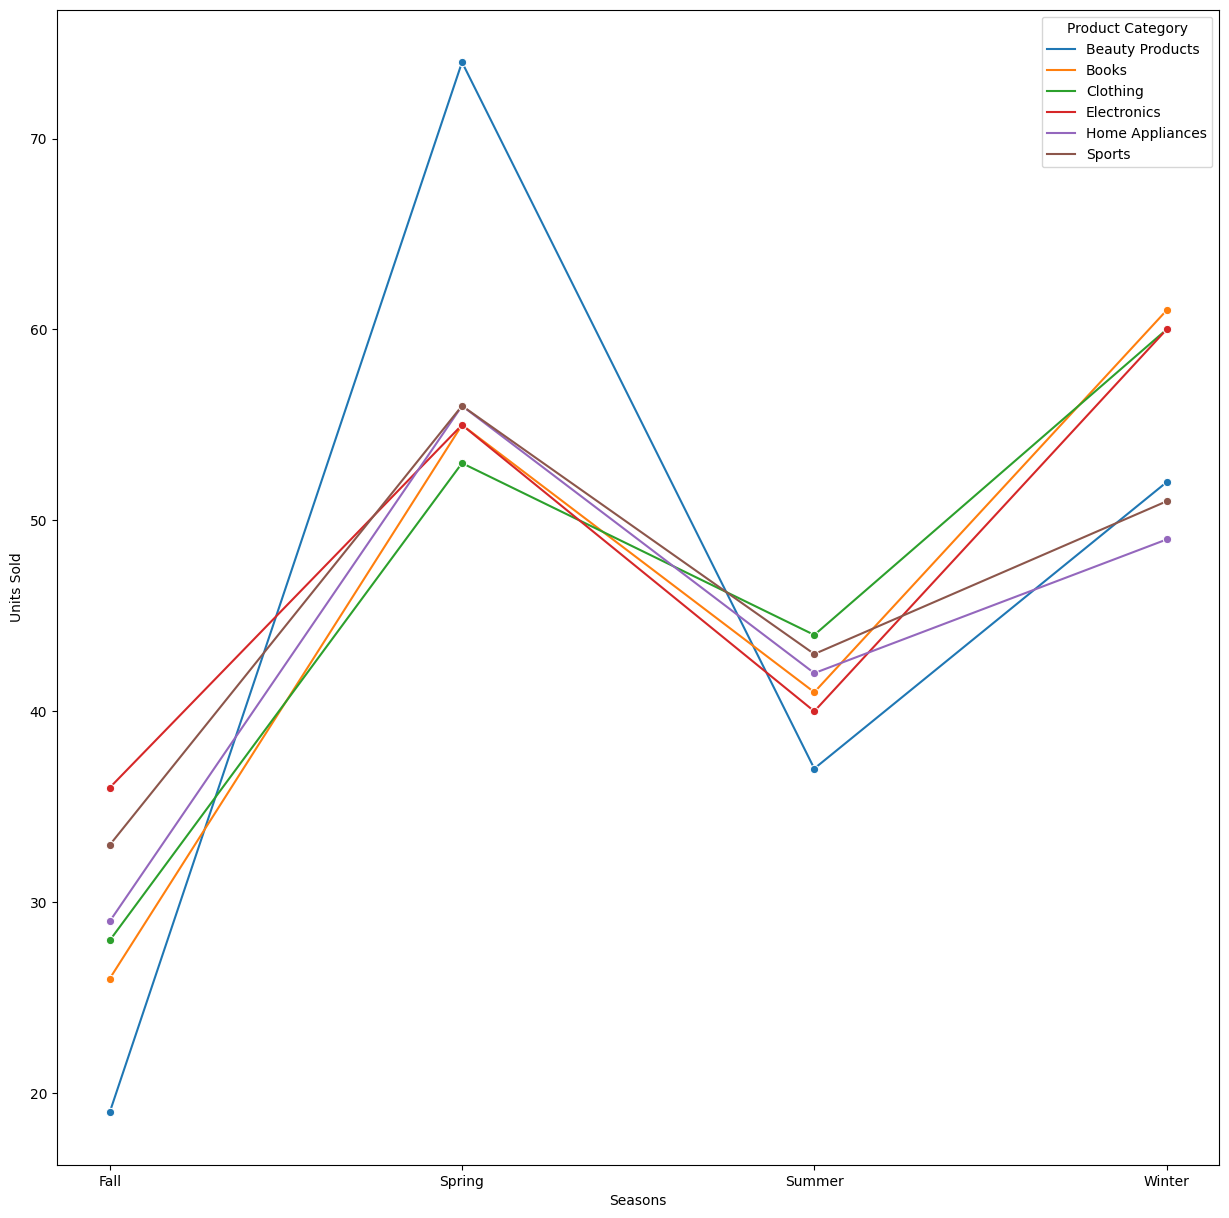

In [274]:

plt.figure(figsize=(15,15))
sns.lineplot(data=df_season, x="Seasons", y="Units Sold", hue="Product Category", marker="o")
plt.show()

In [275]:
week_days_map = {
    "Monday":1, "Tuesday":1, "Wednesday":1, "Thursday":1, "Friday":0,
    "Saturday":0, "Sunday":0
}
df['week_days_in_binary']=df['day_of_week'].map(week_days_map)
df['week_days_in_binary']

0       1
1       1
2       1
3       1
4       0
       ..
1095    1
1096    0
1097    0
1098    0
1099    1
Name: week_days_in_binary, Length: 1100, dtype: int64

In [276]:
df_days_in_binary = df.groupby(['week_days_in_binary','Product Category'])['Units Sold'].count().reset_index()
print(df_days_in_binary)

    week_days_in_binary Product Category  Units Sold
0                     0  Beauty Products          78
1                     0            Books          76
2                     0         Clothing          81
3                     0      Electronics          84
4                     0  Home Appliances          65
5                     0           Sports          76
6                     1  Beauty Products         104
7                     1            Books         107
8                     1         Clothing         104
9                     1      Electronics         107
10                    1  Home Appliances         111
11                    1           Sports         107


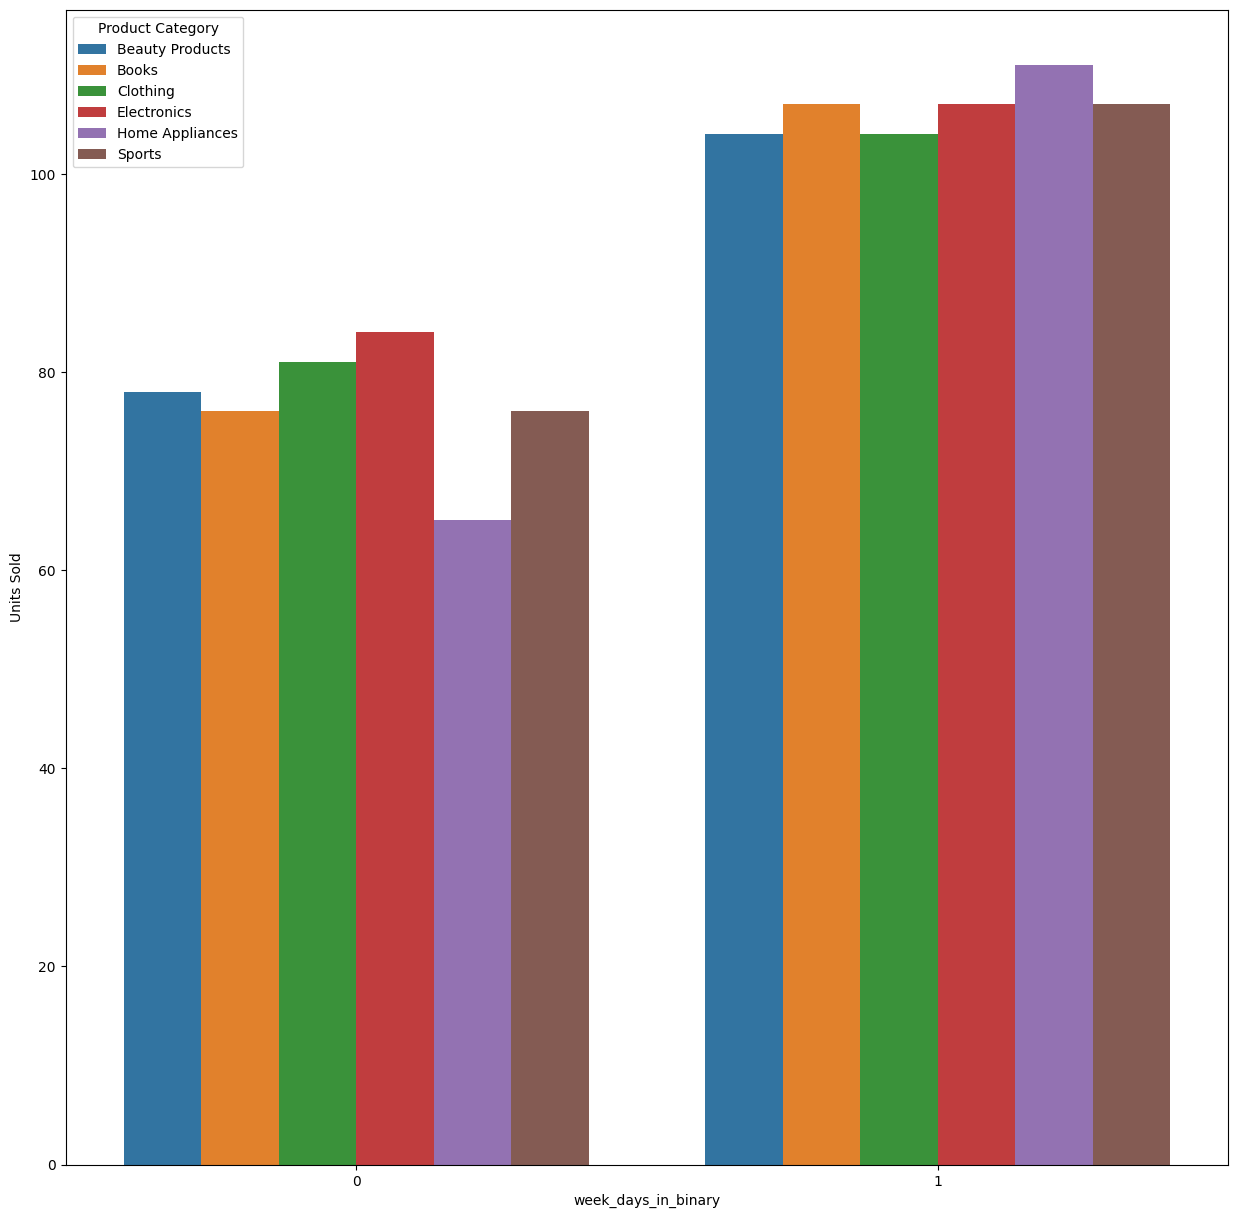

In [277]:
plt.figure(figsize=(15,15))
sns.barplot(data=df_days_in_binary, x='week_days_in_binary', y="Units Sold", hue="Product Category")
plt.show()
#we can see that transactions counted are more in weekday than in weekends in all categories of products

Calculate days since first transaction (customer lifecycle indicators)

**Business Metrics**

Price per unit categories (Low, Medium, High based on quartiles)

In [278]:
Q1=df['Unit Price'].quantile(0.25)
Q2=Q3-Q1
Q3 = df['Unit Price'].quantile(0.75)

df['Categorized Unit Price'] = df['Unit Price'].apply(lambda x:"Low" if x<Q1 else ('meduim'if x>=Q1 and x<=Q3 else 'High') )
df['Categorized Unit Price']


0         High
1       meduim
2       meduim
3          Low
4       meduim
         ...  
1095       Low
1096      High
1097      High
1098    meduim
1099    meduim
Name: Categorized Unit Price, Length: 1100, dtype: object

In [279]:
unit_value=df['Categorized Unit Price'].value_counts()
unit_value

Categorized Unit Price
meduim    550
High      275
Low       275
Name: count, dtype: int64

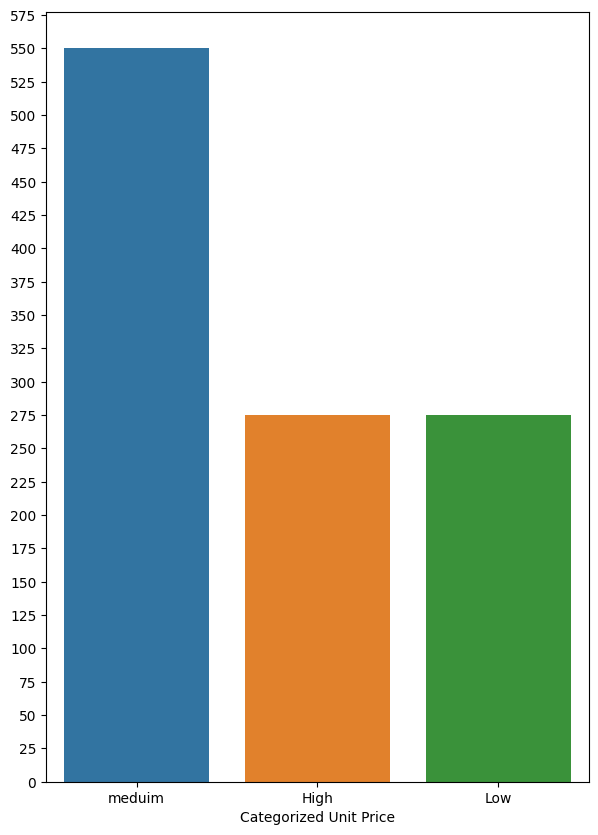

In [280]:
plt.figure(figsize=(7,10))
sns.barplot(x=unit_value.index,y=unit_value.values)
plt.yticks(np.arange(0,600,25))
plt.show()

In [281]:
df

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day_of_week,Week_Number,Month_of_Year,Seasons,week_days_in_binary,Categorized Unit Price
0,10001,2024-01-01,Electronics,2.0,999.989990,1999.980,North America,Credit Card,Monday,1,January,Winter,1,High
1,10002,2024-01-02,Home Appliances,1.0,499.989990,499.990,Europe,PayPal,Tuesday,1,January,Winter,1,meduim
2,10003,2024-01-03,Clothing,3.0,69.989998,209.970,Asia,Debit Card,Wednesday,1,January,Winter,1,meduim
3,10004,2024-01-04,Books,4.0,15.990000,63.960,North America,Credit Card,Thursday,1,January,Winter,1,Low
4,10005,2024-01-05,Beauty Products,1.0,89.989998,89.990,Europe,PayPal,Friday,1,January,Winter,0,meduim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11096,2024-04-01,Clothing,1.0,1.000000,1.000,Europe,Debit Card,Monday,14,April,Spring,1,Low
1096,11097,2025-02-07,Electronics,4.0,884.260010,2935.135,Europe,Credit Card,Friday,6,February,Winter,0,High
1097,11098,2024-06-14,Electronics,4.0,1169.380005,2935.135,Asia,PayPal,Friday,24,June,Summer,0,High
1098,11099,2024-02-03,Sports,4.0,539.799988,2159.200,North America,Gift Card,Saturday,5,February,Winter,0,meduim


Order size categories (Single item, Small bulk, Large bulk)

In [282]:
df['Units Sold Categorized']=df['Units Sold'].round().astype(int).apply(lambda x: 'Single Item' if x==1 else('Small Bulk'if x>=2 & x<=5 else 'Large Bulk'))
df['Units Sold Categorized']


0        Small Bulk
1       Single Item
2        Small Bulk
3        Small Bulk
4       Single Item
           ...     
1095    Single Item
1096     Small Bulk
1097     Small Bulk
1098     Small Bulk
1099    Single Item
Name: Units Sold Categorized, Length: 1100, dtype: object

In [283]:
Transaction_by_units_sold_catogrized= df.groupby(['Units Sold Categorized'])['Transaction ID'].count()
Transaction_by_units_sold_catogrized


Units Sold Categorized
Single Item    435
Small Bulk     665
Name: Transaction ID, dtype: int64

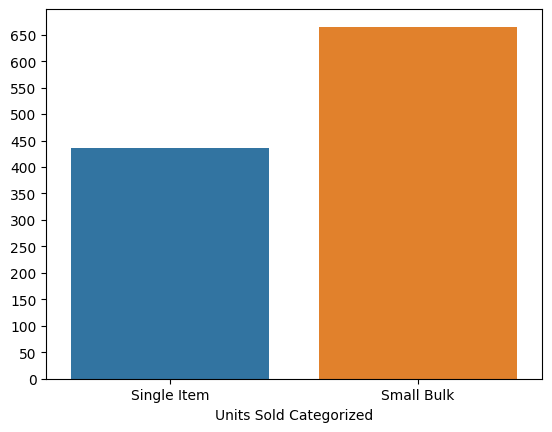

In [284]:
sns.barplot(x=Transaction_by_units_sold_catogrized.index,y=Transaction_by_units_sold_catogrized.values)
plt.yticks(np.arange(0,700,50))
plt.show()

Revenue tiers for transactions

In [285]:
Q1=df['Total Revenue'].quantile(0.33)
Q2=Q3-Q1
Q3 = df['Total Revenue'].quantile(0.66)

df['Categorized Total Revenue'] = df['Total Revenue'].apply(lambda x:"Budget" if x<Q1 else ('Standard'if x>=Q1 and x<=Q3 else 'Premuim') )
df['Categorized Total Revenue']

0        Premuim
1       Standard
2       Standard
3         Budget
4         Budget
          ...   
1095      Budget
1096     Premuim
1097     Premuim
1098     Premuim
1099    Standard
Name: Categorized Total Revenue, Length: 1100, dtype: object

In [286]:
Transaction_by_total_revenue_catogrized= df.groupby(['Categorized Total Revenue'])['Transaction ID'].count()
Transaction_by_total_revenue_catogrized

Categorized Total Revenue
Budget      360
Premuim     374
Standard    366
Name: Transaction ID, dtype: int64

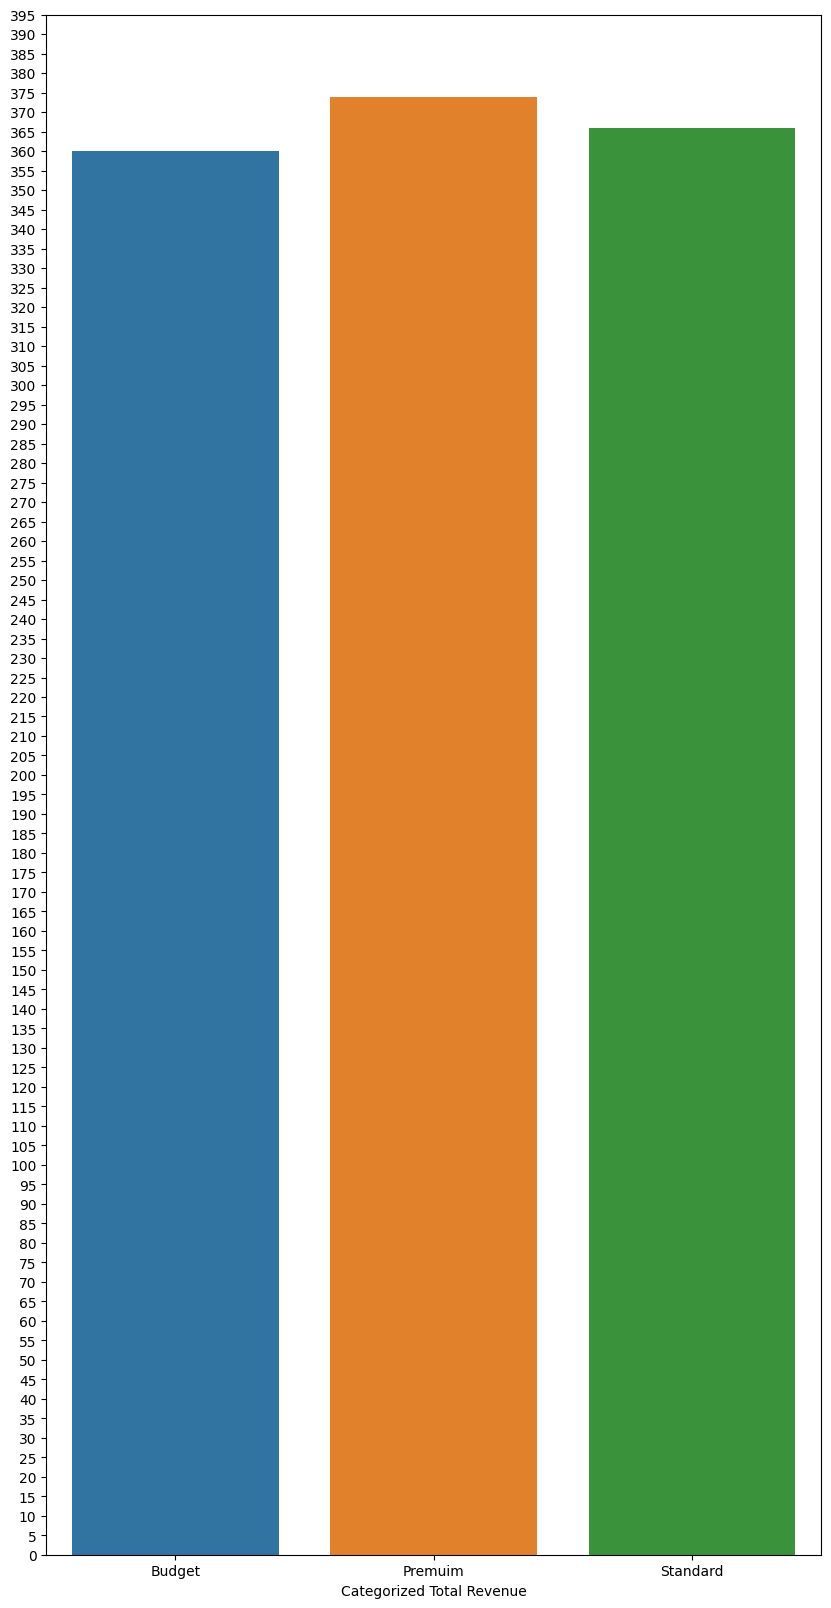

In [287]:
plt.figure(figsize=(10,20))
sns.barplot(x=Transaction_by_total_revenue_catogrized.index,y=Transaction_by_total_revenue_catogrized.values)
plt.yticks(np.arange(0,400,5))
plt.show()

Product category groupings

In [288]:
df['Product Category'].value_counts()

Product Category
Electronics        191
Clothing           185
Books              183
Sports             183
Beauty Products    182
Home Appliances    176
Name: count, dtype: int64

In [289]:
def grouping_category(x):
    if x in ['Electronics', 'Home Appliances']:
        return 'Electronic Gadgets'
    elif x in ['Beauty Products', 'Clothing']:
        return 'Fashion Items'
    else:
        return 'Entertainment Products'

df['Product Category'] = df['Product Category'].apply(grouping_category)
df['Product Category'].value_counts()

Product Category
Electronic Gadgets        367
Fashion Items             367
Entertainment Products    366
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

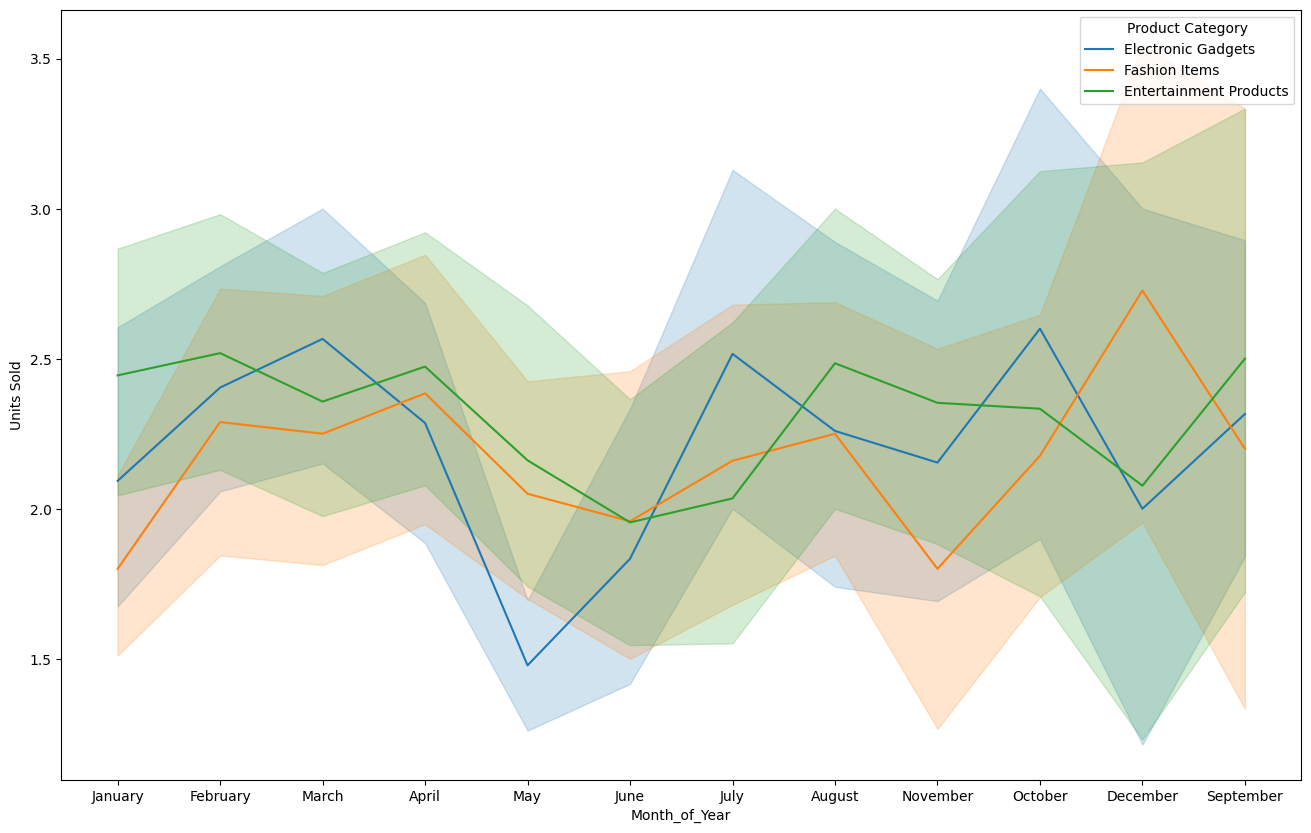

In [290]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df,x='Month_of_Year',y='Units Sold',hue='Product Category')
plt.show()

**Geographic Features**

Revenue concentration by region

In [291]:
#Already this question was answered before
Revenue_by_Region_sum=df.groupby(['Region'])['Total Revenue'].sum()
Revenue_by_Region_percentage=(Revenue_by_Region_sum/Revenue_by_Region_sum.sum())*100
print(f"percentage of total marketplace revenue comes from each geographic region are : {Revenue_by_Region_percentage}")

percentage of total marketplace revenue comes from each geographic region are : Region
Asia             32.090004
Europe           32.161632
North America    35.748364
Name: Total Revenue, dtype: float64


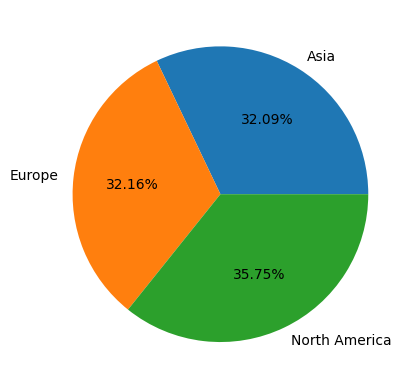

In [292]:
labels=Revenue_by_Region_percentage.index
plt.pie(x=Revenue_by_Region_percentage,autopct='%0.2f%%',labels=labels)
plt.show()
# North America is the Most the dominant market , then comes Europe in the second place

Regional market penetration metrics

average revenue per transaction by region : Region
Asia             796.541483
Europe           789.399679
North America    855.917670
Name: Total Revenue, dtype: float64


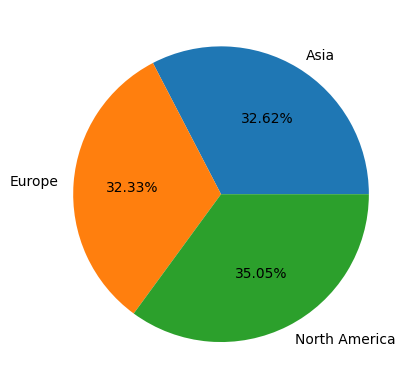

'North America is the Most the dominant market for average revenue per transaction , then comes Asia\nthis time in the Second place, but Europe here is the Third!!'

In [293]:
Revenue_by_Region_mean=df.groupby(['Region'])['Total Revenue'].mean()
print(f"average revenue per transaction by region : {Revenue_by_Region_mean}")
labels=Revenue_by_Region_mean.index
plt.pie(x=Revenue_by_Region_mean,autopct='%0.2f%%',labels=labels)
plt.show()
'''North America is the Most the dominant market for average revenue per transaction , then comes Asia
this time in the Second place, but Europe here is the Third!!'''

average revenue per transaction by region : Region
Asia             354
Europe           358
North America    367
Name: Total Revenue, dtype: int64


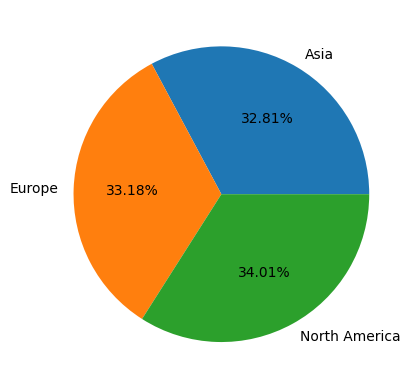

'North America is the Most the dominant market for Transactions count \nor number of selling operations,then comes Europe\nthis time in the Second place, but Asia here is the Third!!'

In [294]:
Revenue_by_Region_count=df.groupby(['Region'])['Total Revenue'].count()
print(f"average revenue per transaction by region : {Revenue_by_Region_count}")
labels=Revenue_by_Region_count.index
plt.pie(x=Revenue_by_Region_count,autopct='%0.2f%%',labels=labels)
plt.show()
'''North America is the Most the dominant market for Transactions count 
or number of selling operations,then comes Europe
this time in the Second place, but Asia here is the Third!!'''

**Advanced Features**

Average selling price by product category

In [295]:
Revenue_by_category_mean=df.groupby(['Product Category'])['Total Revenue'].mean()
Revenue_by_category_mean

Product Category
Electronic Gadgets        965.186962
Entertainment Products    811.976407
Fashion Items             685.754673
Name: Total Revenue, dtype: float64

'Fashion Items like Beauty products and clothing have the lowest pricing,\ncompared to Electronic Gadgets like Electronics or Home appliances'

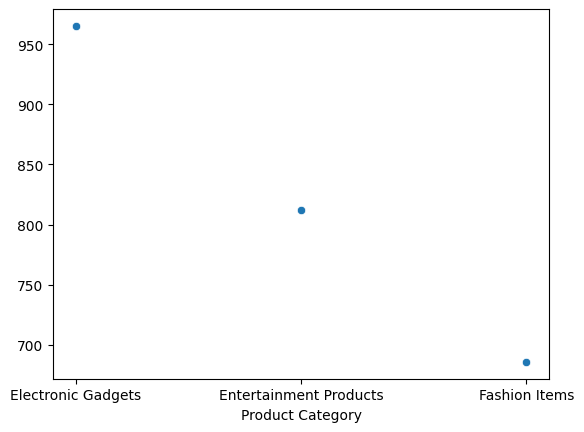

In [296]:
sns.scatterplot(x=Revenue_by_category_mean.index,y=Revenue_by_category_mean.values)
'''Fashion Items like Beauty products and clothing have the lowest pricing,
compared to Electronic Gadgets like Electronics or Home appliances'''

Category performance relative to overall marketplace

In [297]:
Revenue_by_category_mean=df.groupby(['Product Category'])['Total Revenue'].mean()
relative_revenue_means=Revenue_by_category_mean/df['Total Revenue'].mean()
relative_revenue_means
#mean for Electronic Gadgets Exceed Total revenue mean, whic means the Electronic Gadgets makes a fortune

Product Category
Electronic Gadgets        1.175651
Entertainment Products    0.989032
Fashion Items             0.835287
Name: Total Revenue, dtype: float64

In [298]:
Revenue_by_category_counts=df.groupby(['Product Category'])['Total Revenue'].count()
revenue_category_counts_by_total_mean=Revenue_by_category_counts/df['Total Revenue'].mean()
revenue_category_counts_by_total_mean
#number of transaction operations of each category couldn't exceed the total revenue mean

Product Category
Electronic Gadgets        0.447026
Entertainment Products    0.445808
Fashion Items             0.447026
Name: Total Revenue, dtype: float64

Payment method efficiency metrics

In [299]:
Total_Revenue_by_Payment_method=df.groupby(['Payment Method'])['Total Revenue'].sum()
Revenue_by_Payment_method_counts=df.groupby(['Payment Method'])['Total Revenue'].count()
average_transaction_size_by_payment_method=Total_Revenue_by_Payment_method/Revenue_by_Payment_method_counts
print(f"Average transaction size by payment method: {average_transaction_size_by_payment_method}")


Average transaction size by payment method: Payment Method
Bank Transfer     946.453333
Credit Card       892.758325
Cryptocurrency    341.368000
Debit Card        632.007677
Gift Card         580.973333
Mobile Payment    454.414000
PayPal            818.525015
Name: Total Revenue, dtype: float64


Transaction complexity scores

In [300]:
Transaction_complexity_indicator1=unit_value['High']/unit_value['Low']
Transaction_complexity_indicator2=Transaction_by_total_revenue_catogrized['Premuim']/Transaction_by_total_revenue_catogrized['Budget']
Transaction_complexity_indicator3=Transaction_by_units_sold_catogrized['Single Item']/Transaction_by_units_sold_catogrized['Small Bulk']
print(f"High vs Low: {Transaction_complexity_indicator1}")
print(f"Premuim vs Budget: {Transaction_complexity_indicator2}")
print(f"single Item vs small Bulk: {Transaction_complexity_indicator3}")

High vs Low: 1.0
Premuim vs Budget: 1.038888888888889
single Item vs small Bulk: 0.6541353383458647


**Feature Transformation**

In [301]:
df[['Product Category','Region','Payment Method']]=df[['Product Category','Region','Payment Method']].astype('category')

In [307]:
df['Region'].unique()

['North America', 'Europe', 'Asia']
Categories (3, object): ['Asia', 'Europe', 'North America']

In [308]:
df = df.dropna(subset=['Region'])


In [309]:
df['Product Category'],_=pd.factorize(df['Product Category'])
df['Region'],_=pd.factorize(df['Region'])
df['Payment Method'],_=pd.factorize(df['Payment Method'])
df['day_of_week'],_=pd.factorize(df['day_of_week'])
df['Month_of_Year'],_=pd.factorize(df['Month_of_Year'])
df['Seasons'],_=pd.factorize(df['Seasons'])
df['Categorized Unit Price'],_=pd.factorize(df['Categorized Unit Price'])
df['Units Sold Categorized'],_=pd.factorize(df['Units Sold Categorized'])
df['Categorized Total Revenue'],_=pd.factorize(df['Categorized Total Revenue'])
df

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,day_of_week,Week_Number,Month_of_Year,Seasons,week_days_in_binary,Categorized Unit Price,Units Sold Categorized,Categorized Total Revenue
0,10001,2024-01-01,0,2.0,999.989990,1999.980,0,0,0,1,0,0,1,0,0,0
1,10002,2024-01-02,0,1.0,499.989990,499.990,1,1,1,1,0,0,1,1,1,1
2,10003,2024-01-03,1,3.0,69.989998,209.970,2,2,2,1,0,0,1,1,0,1
3,10004,2024-01-04,2,4.0,15.990000,63.960,0,0,3,1,0,0,1,2,0,2
4,10005,2024-01-05,1,1.0,89.989998,89.990,1,1,4,1,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11096,2024-04-01,1,1.0,1.000000,1.000,1,2,0,14,3,1,1,2,1,2
1096,11097,2025-02-07,0,4.0,884.260010,2935.135,1,0,4,6,1,0,0,0,0,0
1097,11098,2024-06-14,0,4.0,1169.380005,2935.135,2,1,4,24,5,2,0,0,0,0
1098,11099,2024-02-03,2,4.0,539.799988,2159.200,0,4,5,5,1,0,0,1,0,0


In [310]:
df['Region'].unique()

array([0, 1, 2])

# **5. Statistical Analysis and Hypothesis Testing**

**Regional Performance Comparison**

Test if mean transaction values differ significantly across regions

In [312]:
Revenue_by_Region_EU=df[df['Region']==1]['Total Revenue']
Revenue_by_Region_AS=df[df['Region']==2]['Total Revenue']
Revenue_by_Region_NA=df[df['Region']==0]['Total Revenue']


f_stat, p_value = stats.f_oneway(
    Revenue_by_Region_EU,
    Revenue_by_Region_AS,
    Revenue_by_Region_NA
)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 0.5288721685899003
P-value: 0.5894222912085704


In [313]:
alpha=0.05 #common threshold
if p_value <alpha:
    print('Regect null hypothesis. There is significant difference in mean total revenues between regions')
else:
    print('fail to reject null hypothesis. There is no significant difference in mean total revenues between regions')
    

fail to reject null hypothesis. There is no significant difference in mean total revenues between regions


Investigate if product category preferences vary by region

In [314]:
import pandas as pd
from scipy.stats import chi2_contingency

# contingency table (cross-tab of Region vs Product Category)
contingency_table = pd.crosstab(df['Region'], df['Product Category'])

# Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
print("Expected Frequencies:\n", expected)

#A larger χ² means observed frequencies deviate from expected ones.

Chi-Square Statistic: 15.425512812080857
Degrees of Freedom: 4
P-value: 0.0038953638058888142
Expected Frequencies:
 [[123.12696942 121.08619092 122.78683967]
 [120.10750695 118.11677479 119.77571826]
 [118.76552363 116.79703429 118.43744208]]


In [315]:
alpha=0.05 #common threshold
if p_value <alpha:
    print('Regect null hypothesis. There is significant difference in chi-square of product categories between regions')
else:
    print('fail to reject null hypothesis. There is no significant difference in chi-square of product categories between regions')
    

Regect null hypothesis. There is significant difference in chi-square of product categories between regions


In [320]:
import numpy as np

observed = pd.crosstab(df['Region'],df['Product Category']).values
expected = expected  # from chi2_contingency
residuals = (observed - expected) / np.sqrt(expected)

print(residuals)

[[ 0.16879838 -1.91624408  1.73389541]
 [ 0.99389891  1.09339866 -2.0810748 ]
 [-1.17136823  0.85155342  0.32735383]]


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


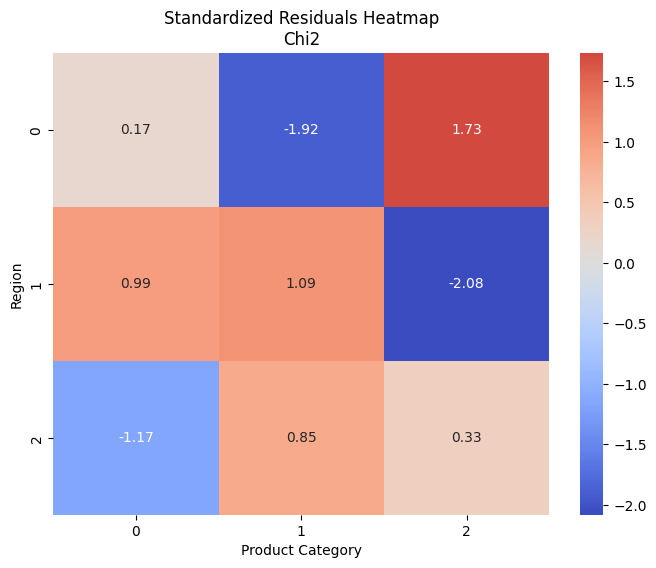

In [324]:

plt.figure(figsize=(8,6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0,
            xticklabels=contingency_table.columns,
            yticklabels=contingency_table.index,
            fmt=".2f")

plt.title("Standardized Residuals Heatmap\nChi2")
plt.xlabel("Product Category")
plt.ylabel("Region")
plt.show()


**Payment Method Analysis**

Test if average order values differ by payment method

In [325]:
Revenue_by_Payment_method_0=df[df['Payment Method']==0]['Total Revenue']
Revenue_by_payment_method_1=df[df['Payment Method']==1]['Total Revenue']
Revenue_by_payment_method_2=df[df['Payment Method']==2]['Total Revenue']
Revenue_by_payment_method_3=df[df['Payment Method']==3]['Total Revenue']
Revenue_by_payment_method_4=df[df['Payment Method']==4]['Total Revenue']
Revenue_by_payment_method_5=df[df['Payment Method']==5]['Total Revenue']
Revenue_by_payment_method_6=df[df['Payment Method']==6]['Total Revenue']

f_stat, p_value = stats.f_oneway(
    Revenue_by_Payment_method_0,
    Revenue_by_payment_method_1,
    Revenue_by_payment_method_2,
    Revenue_by_payment_method_3,
    Revenue_by_payment_method_4,
    Revenue_by_payment_method_5,
    Revenue_by_payment_method_6)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 2.233210237159761
P-value: 0.03792914129935227


In [326]:
alpha=0.05 #common threshold
if p_value < alpha:
    print('Regect null hypothesis. There is significant difference in mean total revenues between Payment methods')
else:
    print('fail to reject null hypothesis. There is no significant difference in mean total revenues between Payment methods')
    

Regect null hypothesis. There is significant difference in mean total revenues between Payment methods


Analyze if payment method adoption is uniform across regions

In [329]:

import pandas as pd
from scipy.stats import chi2_contingency

# contingency table (cross-tab of Region vs Product Category)
contingency_table = pd.crosstab(df['Region'], df['Payment Method'])

# Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
print("Expected Frequencies:\n", expected)

#A larger χ² means observed frequencies deviate strongly from expected ones.

Chi-Square Statistic: 173.25025426051414
Degrees of Freedom: 12
P-value: 1.032109641800695e-30
Expected Frequencies:
 [[190.81278962 110.54216867  52.72011121   3.4012975    5.10194625
    3.4012975    1.02038925]
 [186.1334569  107.8313253   51.42724745   3.31788693   4.9768304
    3.31788693   0.99536608]
 [184.05375348 106.62650602  50.85264133   3.28081557   4.92122335
    3.28081557   0.98424467]]


In [330]:
alpha=0.05 #common threshold
if p_value <alpha:
    print('Regect null hypothesis which means that the result is : Payment method adoption differs by region')
else:
    print('fail to reject null hypothesis which means that the result is :Payment method adoption is uniform across regions')
    

Regect null hypothesis which means that the result is : Payment method adoption differs by region


**Product Category Insights:**

Test for significant differences in average prices across categories

In [331]:
Revenue_by_Product_Category_0=df[df['Product Category']==0]['Total Revenue']
Revenue_by_Product_Category_1=df[df['Product Category']==1]['Total Revenue']
Revenue_by_Product_Category_2=df[df['Product Category']==2]['Total Revenue']


In [332]:
# using F-Test method due to numerical data

# contingency table (cross-tab of Region vs Product Category)
contingency_table = pd.crosstab(df['Product Category'], df['Total Revenue'])

f_stat, p_value = stats.f_oneway(
    Revenue_by_Product_Category_0,
    Revenue_by_Product_Category_1,
   Revenue_by_Product_Category_2)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 8.268140534143788
P-value: 0.00027321529071691906


In [333]:
alpha=0.05 #common threshold
if p_value <alpha:
    print('Regect null hypothesis .there is significant differences in average prices across categories')
else:
    print('fail to reject null hypothesis.there is not significant differences in average prices across categories')
    

Regect null hypothesis .there is significant differences in average prices across categories


# **6. Advanced Analytics & Business Insights**

**Customer Segmentation (Transaction-Based)**

Segment transactions by order value, quantity, and frequency patterns

In [334]:
# Convert Units Sold to numeric
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')

# Order Value is already Total Revenue
df['Order Value'] = df['Total Revenue']


In [335]:
def segment_transaction(row):
    if row['Order Value'] < 100:
        return "Budget Shoppers"
    elif row['Units Sold'] >= 5:
        return "Bulk Buyers"
    elif row['Order Value'] >= 500:
        return "Premium Customers"
    else:
        return "Regular Shoppers"

df['Segment'] = df.apply(segment_transaction, axis=1)
segment_counts = df['Segment'].value_counts(normalize=True) * 100
print(segment_counts)

Segment
Premium Customers    40.222428
Budget Shoppers      29.471733
Regular Shoppers     21.501390
Bulk Buyers           8.804449
Name: proportion, dtype: float64


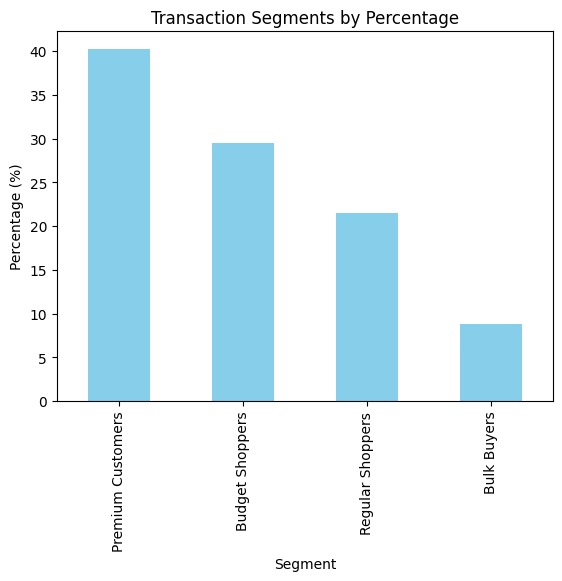

In [336]:
segment_counts.plot(kind='bar', color='skyblue')
plt.title("Transaction Segments by Percentage")
plt.ylabel("Percentage (%)")
plt.show()


Analyze payment method preferences by segment

In [340]:
payment_by_segment = pd.crosstab(df['Segment'], df['Payment Method'], normalize='index') * 100
print(payment_by_segment.round(2))

Payment Method         0      1      2     3     4     5     6
Segment                                                       
Budget Shoppers    50.00  30.19  14.78  1.57  1.57  1.57  0.31
Bulk Buyers        55.79  28.42  14.74  0.00  0.00  1.05  0.00
Premium Customers  54.84  29.72  12.21  0.69  1.61  0.46  0.46
Regular Shoppers   47.84  31.47  17.67  0.86  1.29  0.86  0.00


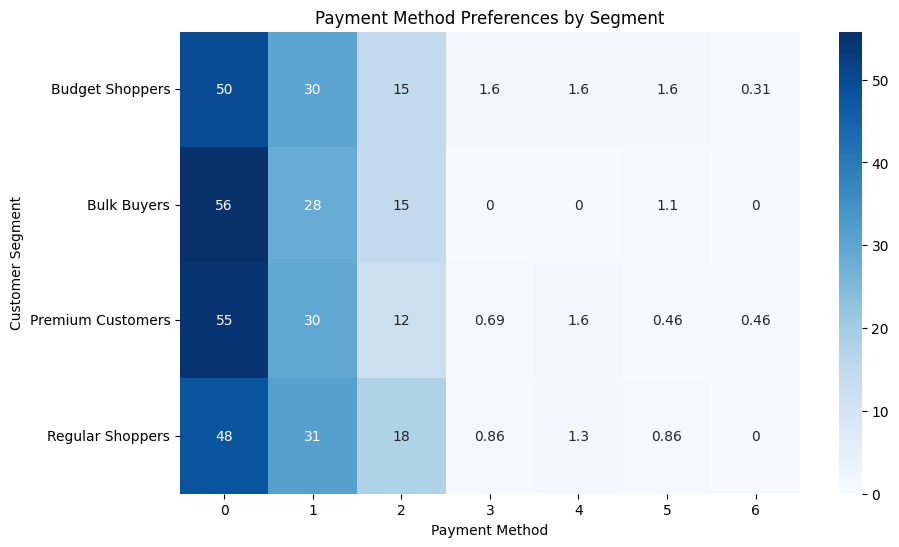

In [341]:
plt.figure(figsize=(10,6))
sns.heatmap(payment_by_segment, annot=True, cmap="Blues")
plt.title("Payment Method Preferences by Segment")
plt.ylabel("Customer Segment")
plt.xlabel("Payment Method")
plt.show()

Identify high-value transaction characteristics

In [342]:
threshold = df['Total Revenue'].quantile(0.80)
df['High_Value'] = df['Total Revenue'] >= threshold

print(f"Revenue threshold for high-value transactions: {threshold:.2f}")
print(df['High_Value'].value_counts())


Revenue threshold for high-value transactions: 1528.30
High_Value
False    863
True     216
Name: count, dtype: int64


In [343]:
# Product categories
category_profile = pd.crosstab(df['High_Value'], df['Product Category'], normalize='index') * 100

# Regions
region_profile = pd.crosstab(df['High_Value'], df['Region'], normalize='index') * 100

# Payment methods
payment_profile = pd.crosstab(df['High_Value'], df['Payment Method'], normalize='index') * 100

print("Product Category Profile:\n", category_profile.round(2))
print("\nRegion Profile:\n", region_profile.round(2))
print("\nPayment Method Profile:\n", payment_profile.round(2))


Product Category Profile:
 Product Category      0      1      2
High_Value                           
False             32.10  34.30  33.60
True              39.35  27.78  32.87

Region Profile:
 Region          0      1      2
High_Value                     
False       33.49  33.49  33.02
True        36.11  31.94  31.94

Payment Method Profile:
 Payment Method      0      1      2     3     4     5     6
High_Value                                                 
False           49.94  30.36  15.76  1.16  1.51  1.04  0.23
True            60.19  29.17   8.80  0.00  0.93  0.46  0.46


In [346]:
time_profile = pd.crosstab(df['High_Value'], df['Month_of_Year'], normalize='index') * 100
print(time_profile.round(2))


Month_of_Year     0      1      2      3     4     5     6     7     8     9   \
High_Value                                                                      
False          12.51  13.44  12.75   9.73  9.15  7.07  8.34  8.57  4.63  5.21   
True            9.26  15.28  12.96  12.96  6.02  4.17  6.02  6.48  7.41  7.41   

Month_of_Year    10    11  
High_Value                 
False          4.29  4.29  
True           5.56  6.48  


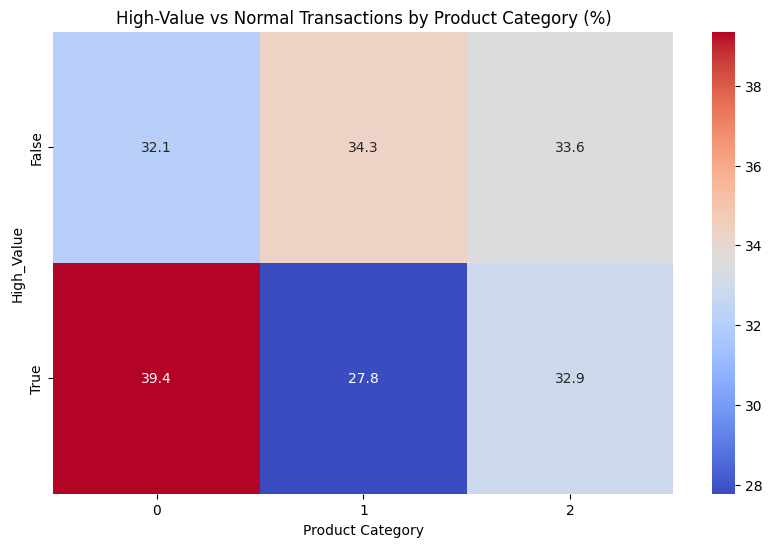

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(category_profile, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("High-Value vs Normal Transactions by Product Category (%)")
plt.show()


**Revenue Optimization Analysis**

Identify underperforming product categories by region

In [348]:
#Calculate the overall average revenue
avg_revenue = df["Total Revenue"].mean()


In [350]:
#Group by Region and Product Category to get average revenue
category_region_revenue = (
    df.groupby(["Region", "Product Category"])["Total Revenue"]
    .mean()
    .reset_index()
)

In [351]:
#Flag underperforming categories (below overall average revenue)
underperforming = category_region_revenue[
    category_region_revenue["Total Revenue"] < avg_revenue
]

print("Overall Average Revenue:", avg_revenue)
print("\nUnderperforming Product Categories by Region:")
print(underperforming)

Overall Average Revenue: 814.3675208526413

Underperforming Product Categories by Region:
   Region  Product Category  Total Revenue
1       0                 1     804.432500
4       1                 1     572.526423
7       2                 1     686.083810
8       2                 2     687.784180


<Axes: xlabel='Product Category', ylabel='Total Revenue'>

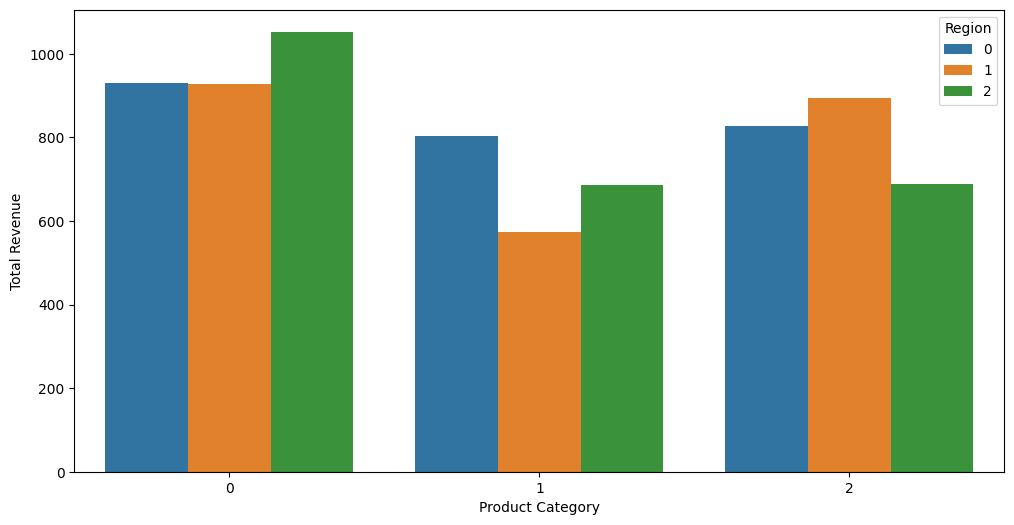

In [352]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_region_revenue,
    x="Product Category",
    y="Total Revenue",
    hue="Region"
)

Analyze pricing patterns and opportunities across categories

Pricing Patterns Across Categories & Regions:
   Region  Product Category  min          max        mean
0       0                 0  1.0  1570.849976  488.690552
1       0                 1  1.0  1570.849976  402.647705
2       0                 2  1.0  1570.849976  368.258453
3       1                 0  1.0  1570.849976  426.531860
4       1                 1  1.0  1570.849976  292.081909
5       1                 2  1.0  1570.849976  403.123383
6       2                 0  1.0  1570.849976  471.965088
7       2                 1  1.0  1570.849976  318.156189
8       2                 2  1.0  1570.849976  365.265076


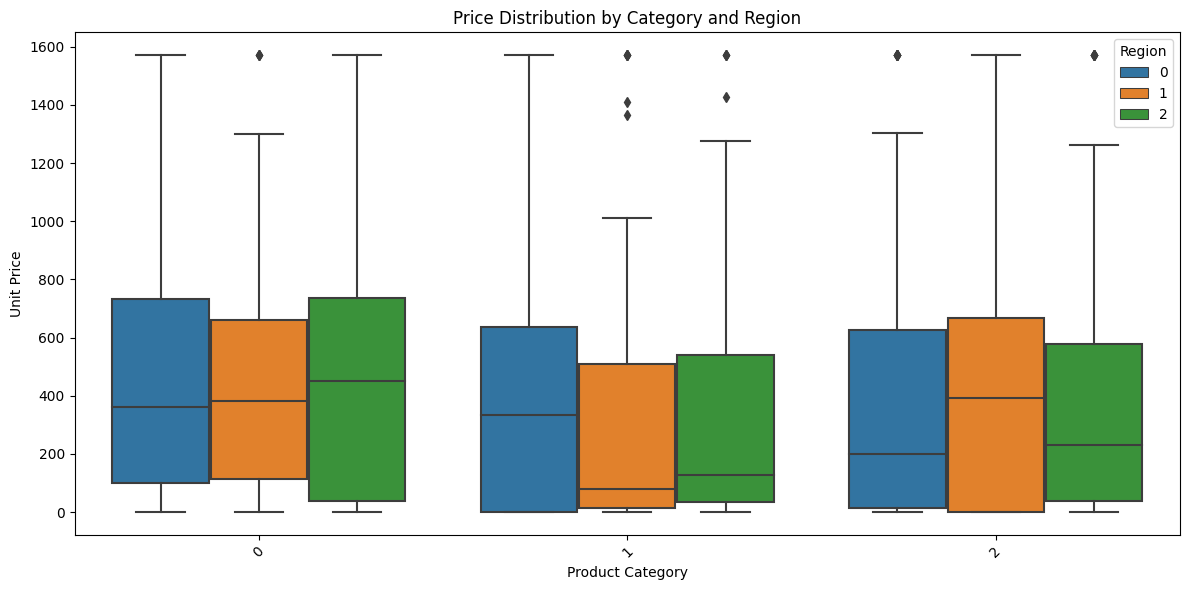

In [355]:
pricing = df.groupby(["Region", "Product Category"])["Unit Price"].agg(["min","max","mean"]).reset_index()

print("Pricing Patterns Across Categories & Regions:")
print(pricing)

# Visualization
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Product Category", y="Unit Price", hue="Region")
plt.title("Price Distribution by Category and Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Compare average order values across different dimensions

In [357]:
# AOV by Region
aov_region = df.groupby("Region")["Total Revenue"].mean()
print("\nAverage Order Value by Region:")
print(aov_region)



Average Order Value by Region:
Region
0    855.917670
1    789.399679
2    796.541483
Name: Total Revenue, dtype: float64


In [358]:
# AOV by Payment Method
aov_payment = df.groupby("Payment Method")["Total Revenue"].mean()
print("\nAverage Order Value by Payment Method:")
print(aov_payment)


Average Order Value by Payment Method:
Payment Method
0    882.725410
1    818.525015
2    632.007677
3    341.368000
4    580.973333
5    454.414000
6    946.453333
Name: Total Revenue, dtype: float64


In [359]:
# AOV by Month (from Date)
aov_month = df.groupby("Month_of_Year")["Total Revenue"].mean()
print("\nAverage Order Value by Month:")
print(aov_month)


Average Order Value by Month:
Month_of_Year
0      745.874961
1      885.868356
2      826.986594
3      898.823929
4      659.553315
5      538.888571
6      708.976941
7      780.814886
8      945.256964
9     1019.343934
10     971.346531
11     908.971373
Name: Total Revenue, dtype: float64


In [360]:
# Average Order Value (AOV) by Product Category 
aov_category = df.groupby("Product Category")["Total Revenue"].mean()
print("Average Order Value by Category:")
print(aov_category)


Average Order Value by Category:
Product Category
0    964.943356
1    677.860239
2    797.991177
Name: Total Revenue, dtype: float64


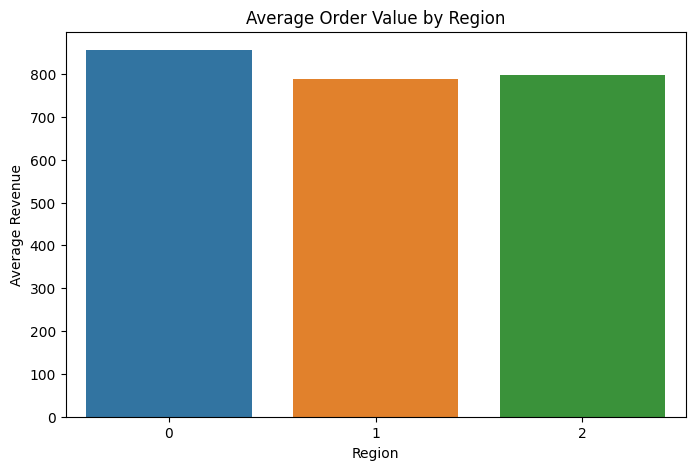

In [361]:
#  Visualization AOV by Region
plt.figure(figsize=(8,5))
sns.barplot(x=aov_region.index, y=aov_region.values)
plt.title("Average Order Value by Region")
plt.ylabel("Average Revenue")
plt.show()


Recommend pricing strategies for different markets

In [369]:
#Pricing Analysis by Category & Region 
avg_price = df.groupby(["Region", "Product Category"])["Total Revenue"].mean().unstack()
print("Average Price per Category by Region:")
print(avg_price)

Average Price per Category by Region:
Product Category            0           1           2
Region                                               
0                  929.873640  804.432500  827.072746
1                  927.143779  572.526423  894.029021
2                 1053.013726  686.083810  687.784180


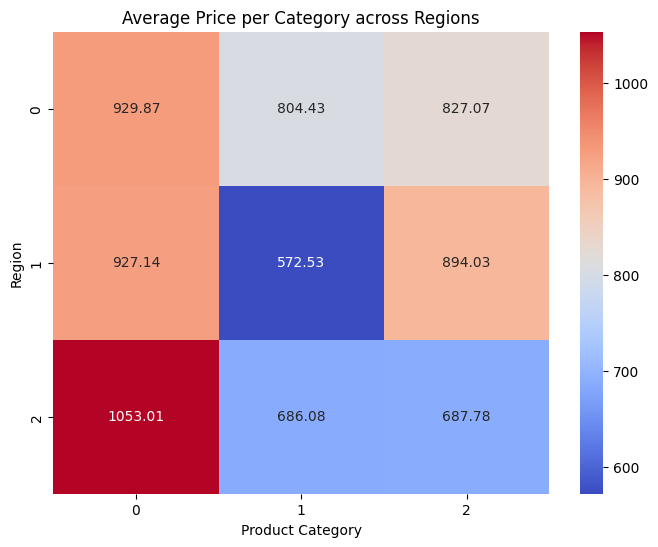

In [370]:
#Visualization: Heatmap of Average Prices
plt.figure(figsize=(8,6))
sns.heatmap(avg_price, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Price per Category across Regions")
plt.ylabel("Region")
plt.xlabel("Product Category")
plt.show()

In [371]:
for category in avg_price.columns:
    highest_region = avg_price[category].idxmax()
    lowest_region = avg_price[category].idxmin()
    print(f"\nCategory: {category}")
    print(f" - Highest pricing in: {highest_region} (may allow premium pricing).")
    print(f" - Lowest pricing in: {lowest_region} (consider discounting or volume strategy).")


Category: 0
 - Highest pricing in: 2 (may allow premium pricing).
 - Lowest pricing in: 1 (consider discounting or volume strategy).

Category: 1
 - Highest pricing in: 0 (may allow premium pricing).
 - Lowest pricing in: 1 (consider discounting or volume strategy).

Category: 2
 - Highest pricing in: 1 (may allow premium pricing).
 - Lowest pricing in: 2 (consider discounting or volume strategy).
